# 0. PREPARACIÓN DE DATOS Y PREPROCESAMIENTO

## 0.1 Importación de Librerías





In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
import math
import random

# Para modelos con scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 0.2 CARGA DEL DATASET

In [39]:
import pandas as pd
from scipy.io import arff
from urllib.request import urlopen
import io
import sys

def load_arff_data(url):
    """Descarga, lee y limpia un archivo ARFF desde una URL."""
    try:
        print(f"Descargando dataset desde: {url.split('/')[-1]}...")

        # Descargar y decodificar en memoria
        response = urlopen(url)
        content = response.read().decode('utf-8')

        # Cargar ARFF y convertir a DataFrame
        data, meta = arff.loadarff(io.StringIO(content))
        df = pd.DataFrame(data)


        str_df = df.select_dtypes([object])
        df[str_df.columns] = str_df.apply(lambda x: x.str.decode('utf-8'))

        return df

    except Exception as e:
        print(f"Error crítico al cargar datos: {e}", file=sys.stderr)
        return None

# --- Ejecución ---

URL = 'https://raw.githubusercontent.com/caamilo03/Proyecto-final-clasificacion-hongos/c517e9bca40cfa3fd64f42932c0db9efefaa8aad/dataset_24_mushroom.arff'

df = load_arff_data(URL)

if df is not None:
    print("=" * 60)
    print("DATASET CARGADO EXITOSAMENTE")
    print(f"• Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    print("=" * 60)

    try:
        display(df.head())
    except NameError:
        print(df.head())

Descargando dataset desde: dataset_24_mushroom.arff...
DATASET CARGADO EXITOSAMENTE
• Dimensiones: 8124 filas x 23 columnas
DATASET CARGADO EXITOSAMENTE
• Dimensiones: 8124 filas x 23 columnas


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## 0.3 LIMPIEZA

In [40]:
print("=" * 80)
print("PREPROCESAMIENTO DE DATOS")
print("=" * 80)

# Separar características y variable objetivo
X = df.drop('class', axis=1)
y = df['class']

# Tratar valores faltantes como categoría adicional
X = X.replace('?', 'missing')
print("✓ Valores faltantes tratados como categoría 'missing'")

print("\n" + "="*80)
print("CREANDO DOS VERSIONES DE CODIFICACIÓN")
print("="*80)

# ==============================================================================
# VERSIÓN 1: LABEL ENCODING (para Random Forest)
# ==============================================================================
print("\n   VERSIÓN 1: Label Encoding")
print("   → Para: Random Forest")
print("   → Por qué: Árboles de decisión pueden manejar variables ordinales\n")

le_dict = {}
X_label = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_label[col] = le.fit_transform(X[col])
    le_dict[col] = le

print(f"    {len(le_dict)} características codificadas con Label Encoding")
print(f"    Dimensiones: {X_label.shape}")

# ==============================================================================
# VERSIÓN 2: ONE-HOT ENCODING (para Regresión Logística, KNN, SVM y MLP)
# ==============================================================================
print("\n   VERSIÓN 2: One-Hot Encoding")
print("   → Para: Regresión Logística, k-NN, SVM, Redes Neuronales")
print("   → Por qué: Método correcto para variables nominales (sin orden)\n")

# Usar pd.get_dummies para One-Hot Encoding
X_onehot = pd.get_dummies(X, drop_first=False, dtype=int)

print(f"    {X_onehot.shape[1]} características después de One-Hot Encoding")
print(f"    Incremento: {X.shape[1]} → {X_onehot.shape[1]} columnas")
print(f"    Dimensiones: {X_onehot.shape}")

# ==============================================================================
# CODIFICAR VARIABLE OBJETIVO (igual para ambas versiones)
# ==============================================================================
print("\n Variable Objetivo (común para ambas versiones):")
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

print(f"   Clases codificadas:")
for i, clase in enumerate(le_y.classes_):
    nombre = 'Comestible' if clase == 'e' else 'Venenoso'
    print(f"      {clase} ({nombre}) → {i}")

print(f"\n   Dimensiones de y: {y_encoded.shape}")

print("\n" + "="*80)
print("RESUMEN DE PREPROCESAMIENTO")
print("="*80)
print(f" X_label (LabelEncoding):    {X_label.shape} - Para RF únicamente")
print(f" X_onehot (One-Hot Encoding): {X_onehot.shape} - Para Logistic, KNN, SVM, MLP")
print("="*80)

PREPROCESAMIENTO DE DATOS
✓ Valores faltantes tratados como categoría 'missing'

CREANDO DOS VERSIONES DE CODIFICACIÓN

   VERSIÓN 1: Label Encoding
   → Para: Random Forest
   → Por qué: Árboles de decisión pueden manejar variables ordinales

    22 características codificadas con Label Encoding
    Dimensiones: (8124, 22)

   VERSIÓN 2: One-Hot Encoding
   → Para: Regresión Logística, k-NN, SVM, Redes Neuronales
   → Por qué: Método correcto para variables nominales (sin orden)

    117 características después de One-Hot Encoding
    Incremento: 22 → 117 columnas
    Dimensiones: (8124, 117)

 Variable Objetivo (común para ambas versiones):
   Clases codificadas:
      e (Comestible) → 0
      p (Venenoso) → 1

   Dimensiones de y: (8124,)

RESUMEN DE PREPROCESAMIENTO
 X_label (LabelEncoding):    (8124, 22) - Para RF únicamente
 X_onehot (One-Hot Encoding): (8124, 117) - Para Logistic, KNN, SVM, MLP


## 0.4 DIVISIÓN DE DATOS
Dividimos los datos en dos conjuntos:
- **Entrenamiento (70%):** Para entrenar los modelos
- **Prueba (30%):** Para evaluación final

In [41]:
print("=" * 80)
print("DIVISIÓN DE DATOS")
print("=" * 80)

# Fijar semilla para reproducibilidad
random.seed(42)
np.random.seed(42)

N = len(y_encoded)
indices = np.random.permutation(N)

# 70% entrenamiento, 30% prueba
train_size = int(math.ceil(0.7 * N))

print(f"\nTotal de muestras: {N:,}")
print(f"Entrenamiento: {train_size:,} ({train_size/N*100:.1f}%)")
print(f"Prueba: {N-train_size:,} ({(N-train_size)/N*100:.1f}%)")

# ==============================================================================
# DIVISIÓN PARA LABEL ENCODING (Regresión Logística y Random Forest)
# ==============================================================================
print("\nConjuntos con LABEL ENCODING (Random Forest):")

Xtrain_label = X_label.values[indices[0:train_size], :]
Xtest_label = X_label.values[indices[train_size:N], :]
Ytrain = y_encoded[indices[0:train_size]].reshape(-1, 1)
Ytest = y_encoded[indices[train_size:N]].reshape(-1, 1)

# Normalizar datos (Label Encoding)
scaler_label = StandardScaler()
Xtrain_label = scaler_label.fit_transform(Xtrain_label)
Xtest_label = scaler_label.transform(Xtest_label)

print(f"   Xtrain_label: {Xtrain_label.shape}")
print(f"   Xtest_label:  {Xtest_label.shape}")
print(f"   ✓ Normalizado con StandardScaler")

# ==============================================================================
# DIVISIÓN PARA ONE-HOT ENCODING (KNN, SVM, Redes Neuronales)
# ==============================================================================
print("\nConjuntos con ONE-HOT ENCODING (para KNN, SVM, MLP):")

Xtrain_onehot = X_onehot.values[indices[0:train_size], :]
Xtest_onehot = X_onehot.values[indices[train_size:N], :]

# Normalizar datos (One-Hot Encoding)
scaler_onehot = StandardScaler()
Xtrain_onehot = scaler_onehot.fit_transform(Xtrain_onehot)
Xtest_onehot = scaler_onehot.transform(Xtest_onehot)

print(f"   Xtrain_onehot: {Xtrain_onehot.shape}")
print(f"   Xtest_onehot:  {Xtest_onehot.shape}")
print(f"   ✓ Normalizado con StandardScaler")

# ==============================================================================
# VARIABLE OBJETIVO (común para ambas versiones)
# ==============================================================================
print("\n  Variable Objetivo (común):")
print(f"   Ytrain: {Ytrain.shape}")
print(f"   Ytest:  {Ytest.shape}")

print("\n" + "="*80)
print("NOTA IMPORTANTE:")
print("="*80)
print(" Xtrain_label / Xtest_label  → Para Modelo 3 (RF) únicamente")
print(" Xtrain_onehot / Xtest_onehot → Para Modelo 1 (Logistic), 2 (KNN), 4 (SVM), 5 (MLP)")
print(" Los indices son los MISMOS para garantizar comparación justa")
print("="*80)

DIVISIÓN DE DATOS

Total de muestras: 8,124
Entrenamiento: 5,687 (70.0%)
Prueba: 2,437 (30.0%)

Conjuntos con LABEL ENCODING (Random Forest):
   Xtrain_label: (5687, 22)
   Xtest_label:  (2437, 22)
   ✓ Normalizado con StandardScaler

Conjuntos con ONE-HOT ENCODING (para KNN, SVM, MLP):
   Xtrain_onehot: (5687, 117)
   Xtest_onehot:  (2437, 117)
   ✓ Normalizado con StandardScaler

  Variable Objetivo (común):
   Ytrain: (5687, 1)
   Ytest:  (2437, 1)

NOTA IMPORTANTE:
 Xtrain_label / Xtest_label  → Para Modelo 3 (RF) únicamente
 Xtrain_onehot / Xtest_onehot → Para Modelo 1 (Logistic), 2 (KNN), 4 (SVM), 5 (MLP)
 Los indices son los MISMOS para garantizar comparación justa


# 4. ENTRENAMIENTO Y EVALUACIÓN DE LOS MODELOS

## Resumen de Hiperparámetros de los 5 modelos

In [42]:
# ====================================================================================================
# ESPECIFICACIÓN DE HIPERPARÁMETROS EVALUADOS
# ====================================================================================================

import pandas as pd
from IPython.display import display

print('='*100)
print('ESPECIFICACIÓN DE HIPERPARÁMETROS ANALIZADOS EN ESTE PROYECTO')
print('='*100)

# ====================================================================================================
# MODELO 1: REGRESIÓN LOGÍSTICA
# ====================================================================================================

print('\n' + '='*100)
print(' MODELO 1: REGRESIÓN LOGÍSTICA (Implementación Manual)')
print('='*100)

modelo1_data = {
    'Hiperparámetro': ['Learning Rate (η)', 'Iteraciones', 'Función de Costo', 'Algoritmo', 'Inicialización'],
    'Valor': ['0.1', '100', 'Binary Cross-Entropy', 'Gradiente Descendente', 'Pesos en ceros'],
    'Tipo': ['Fijo', 'Fijo', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo1 = pd.DataFrame(modelo1_data)
display(df_modelo1)

print('\nDetalles:')
print('  • Método de validación: Hold-Out (70% Train / 30% Test)')
print('  • Total de experimentos: 1')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 2: k-VECINOS MÁS CERCANOS
# ====================================================================================================

print('\n' + '='*100)
print(' MODELO 2: k-VECINOS MÁS CERCANOS (k-NN)')
print('='*100)

modelo2_data = {
    'Hiperparámetro': ['k (vecinos)', 'Métrica de distancia', 'Ponderación', 'Algoritmo'],
    'Valores Evaluados': ['[3, 5, 7, 11, 15, 21, 31, 41, 51]', 'Euclidiana', 'Uniforme', 'Brute force'],
    'Tipo': ['Grid Search (9 valores)', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo2 = pd.DataFrame(modelo2_data)
display(df_modelo2)

print('\nDetalles:')
print('  • Método de validación:')
print('    - Fase 1: Train-Test Split (80/20) para selección de k')
print('    - Fase 2: StratifiedKFold (4 folds) para validación')
print('    - Fase 3: Evaluación en test set (30%)')
print('  • Total de experimentos: 9 configuraciones de k')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 3: RANDOM FOREST
# ====================================================================================================

print('\n' + '='*100)
print(' MODELO 3: RANDOM FOREST')
print('='*100)

modelo3_data = {
    'Hiperparámetro': ['n_estimators', 'max_features', 'min_samples_leaf', 'criterion', 'random_state'],
    'Valores Evaluados': ['[50, 100, 150, 200]', '[5, 10, 15, 20]', '3', 'gini', '42'],
    'Tipo': ['Grid Search (4 valores)', 'Grid Search (4 valores)', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo3 = pd.DataFrame(modelo3_data)
display(df_modelo3)

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de combinaciones: 4 × 4 = 16')
print('  • Total de experimentos: 16 combinaciones × 4 folds = 64')
print('  • Codificación: Label Encoding (22 features)')

# ====================================================================================================
# MODELO 4: RED NEURONAL ARTIFICIAL (MLP)
# ====================================================================================================

print('\n' + '='*100)
print(' MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)')
print('='*100)

modelo4_configs = [
    '1 capa: (10,), (20,), (30,), (50,)',
    '2 capas: (10,10), (20,20), (30,30), (50,50)',
    '3 capas: (10,10,10), (20,20,20), (30,30,30), (50,50,50)'
]

modelo4_data = {
    'Hiperparámetro': ['hidden_layer_sizes', 'activation', 'solver', 'max_iter', 'random_state'],
    'Valores Evaluados': ['12 arquitecturas (ver abajo)', 'relu', 'adam', '350', '1'],
    'Tipo': ['Grid Search (12 arquitecturas)', 'Fijo', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo4 = pd.DataFrame(modelo4_data)
display(df_modelo4)

print('\nArquitecturas evaluadas:')
for config in modelo4_configs:
    print(f'  • {config}')

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de experimentos: 12 arquitecturas × 4 folds = 48')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)
# ====================================================================================================

print('\n' + '='*100)
print(' MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)')
print('='*100)

modelo5_data = {
    'Hiperparámetro': ['kernel', 'gamma', 'C (regularización)', 'random_state'],
    'Valores Evaluados': [
        '[linear, rbf, poly]',
        '[0.001, 0.01, 0.1, 1.0] (para rbf y poly)',
        '[0.1, 1.0, 10.0, 100.0]',
        '42'
    ],
    'Tipo': ['Grid Search (3 valores)', 'Grid Search (4 valores)', 'Grid Search (4 valores)', 'Fijo']
}
df_modelo5 = pd.DataFrame(modelo5_data)
display(df_modelo5)

print('\nCombinaciones evaluadas:')
print('  • kernel=linear: 4 valores de C = 4 configuraciones')
print('  • kernel=rbf: 4 valores de gamma × 4 valores de C = 16 configuraciones')
print('  • kernel=poly: 4 valores de gamma × 4 valores de C = 16 configuraciones')
print('  • Total: 4 + 16 + 16 = 36 configuraciones únicas')

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de experimentos: ~48 configuraciones × 4 folds = 192')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# RESUMEN COMPARATIVO
# ====================================================================================================

print('\n' + '='*100)
print('📋 TABLA RESUMEN: Comparación de Hiperparámetros por Modelo')
print('='*100)

resumen_data = {
    'Modelo': ['Regresión Logística', 'k-NN', 'Random Forest', 'MLP', 'SVM'],
    'Hiperparámetros Principales': [
        'η=0.1, iteraciones=100',
        'k ∈ [3, 5, 7, 11, 15, 21, 31, 41, 51]',
        'n_estimators ∈ [50,100,150,200], max_features ∈ [5,10,15,20]',
        'capas ∈ [1,2,3], neuronas ∈ [10,20,30,50]',
        'kernel ∈ [linear,rbf,poly], C ∈ [0.1,1,10,100]'
    ],
    'Configuraciones': [1, 9, 16, 12, 48],
    'Folds': [4, 4, 4, 4, 4],
    'Total Experimentos': [4, 9, 64, 48, 192],
    'Codificación': ['One-Hot', 'One-Hot', 'Label', 'One-Hot', 'One-Hot']
}

df_resumen = pd.DataFrame(resumen_data)
display(df_resumen)

# ====================================================================================================
# RESUMEN ESTADÍSTICO
# ====================================================================================================

print('\n' + '='*100)
print(' RESUMEN ESTADÍSTICO DEL PROCESO DE BÚSQUEDA')
print('='*100)

total_experimentos = 1 + 9 + 64 + 48 + 192
print(f'\n🔬 Total de experimentos: {total_experimentos}')
print(f'   • Modelo 1 (Regresión Logística):  1 configuración')
print(f'   • Modelo 2 (k-NN):                 9 experimentos')
print(f'   • Modelo 3 (Random Forest):       64 experimentos (16 configuraciones × 4 folds)')
print(f'   • Modelo 4 (MLP):                 48 experimentos (12 configuraciones × 4 folds)')
print(f'   • Modelo 5 (SVM):                192 experimentos (48 configuraciones × 4 folds)')

print(f'\  Estrategia de validación:')
print(f'   • StratifiedKFold: 4 folds (para modelos 2-5)')
print(f'   • Hold-Out: 70% train / 30% test (para modelo 1)')
print(f'   • Evaluación final: Conjunto de test fijo (30%) para todos')

print(f'\n  Métrica de selección:')
print(f'   • Métrica principal: Accuracy (exactitud)')
print(f'   • Métricas secundarias: Precision, Recall, F1-Score')
print(f'   • Criterio de desempate: Menor desviación estándar (mayor estabilidad)')

print(f'\n  Reproducibilidad:')
print(f'   • Semillas aleatorias fijadas: random_state=42 (general), random_state=1 (MLP)')
print(f'   • Mismos índices de train/test para TODOS los modelos')
print(f'   • Normalización: StandardScaler aplicado consistentemente')

print('\n' + '='*100)
print(' Tabla de hiperparámetros cargada correctamente')
print('   → Continuar con el entrenamiento de modelos en las siguientes secciones')
print('='*100)

ESPECIFICACIÓN DE HIPERPARÁMETROS ANALIZADOS EN ESTE PROYECTO

 MODELO 1: REGRESIÓN LOGÍSTICA (Implementación Manual)


,Hiperparámetro,Valor,Tipo
0,Learning Rate (η),0.1,Fijo
1,Iteraciones,100,Fijo
2,Función de Costo,Binary Cross-Entropy,Fijo
3,Algoritmo,Gradiente Descendente,Fijo
4,Inicialización,Pesos en ceros,Fijo



Detalles:
  • Método de validación: Hold-Out (70% Train / 30% Test)
  • Total de experimentos: 1
  • Codificación: One-Hot Encoding (117 features)

 MODELO 2: k-VECINOS MÁS CERCANOS (k-NN)


,Hiperparámetro,Valores Evaluados,Tipo
0,k (vecinos),"[3, 5, 7, 11, 15, 21, 31, 41, 51]",Grid Search (9 valores)
1,Métrica de distancia,Euclidiana,Fijo
2,Ponderación,Uniforme,Fijo
3,Algoritmo,Brute force,Fijo



Detalles:
  • Método de validación:
    - Fase 1: Train-Test Split (80/20) para selección de k
    - Fase 2: StratifiedKFold (4 folds) para validación
    - Fase 3: Evaluación en test set (30%)
  • Total de experimentos: 9 configuraciones de k
  • Codificación: One-Hot Encoding (117 features)

 MODELO 3: RANDOM FOREST


,Hiperparámetro,Valores Evaluados,Tipo
0,n_estimators,"[50, 100, 150, 200]",Grid Search (4 valores)
1,max_features,"[5, 10, 15, 20]",Grid Search (4 valores)
2,min_samples_leaf,3,Fijo
3,criterion,gini,Fijo
4,random_state,42,Fijo



Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de combinaciones: 4 × 4 = 16
  • Total de experimentos: 16 combinaciones × 4 folds = 64
  • Codificación: Label Encoding (22 features)

 MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)


,Hiperparámetro,Valores Evaluados,Tipo
0,hidden_layer_sizes,12 arquitecturas (ver abajo),Grid Search (12 arquitecturas)
1,activation,relu,Fijo
2,solver,adam,Fijo
3,max_iter,350,Fijo
4,random_state,1,Fijo



Arquitecturas evaluadas:
  • 1 capa: (10,), (20,), (30,), (50,)
  • 2 capas: (10,10), (20,20), (30,30), (50,50)
  • 3 capas: (10,10,10), (20,20,20), (30,30,30), (50,50,50)

Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de experimentos: 12 arquitecturas × 4 folds = 48
  • Codificación: One-Hot Encoding (117 features)

 MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)


,Hiperparámetro,Valores Evaluados,Tipo
0,kernel,"[linear, rbf, poly]",Grid Search (3 valores)
1,gamma,"[0.001, 0.01, 0.1, 1.0] (para rbf y poly)",Grid Search (4 valores)
2,C (regularización),"[0.1, 1.0, 10.0, 100.0]",Grid Search (4 valores)
3,random_state,42,Fijo



Combinaciones evaluadas:
  • kernel=linear: 4 valores de C = 4 configuraciones
  • kernel=rbf: 4 valores de gamma × 4 valores de C = 16 configuraciones
  • kernel=poly: 4 valores de gamma × 4 valores de C = 16 configuraciones
  • Total: 4 + 16 + 16 = 36 configuraciones únicas

Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de experimentos: ~48 configuraciones × 4 folds = 192
  • Codificación: One-Hot Encoding (117 features)

📋 TABLA RESUMEN: Comparación de Hiperparámetros por Modelo


,Modelo,Hiperparámetros Principales,Configuraciones,Folds,Total Experimentos,Codificación
0,Regresión Logística,"η=0.1, iteraciones=100",1,4,4,One-Hot
1,k-NN,"k ∈ [3, 5, 7, 11, 15, 21, 31, 41, 51]",9,4,9,One-Hot
2,Random Forest,"n_estimators ∈ [50,100,150,200], max_features ...",16,4,64,Label
3,MLP,"capas ∈ [1,2,3], neuronas ∈ [10,20,30,50]",12,4,48,One-Hot
4,SVM,"kernel ∈ [linear,rbf,poly], C ∈ [0.1,1,10,100]",48,4,192,One-Hot



 RESUMEN ESTADÍSTICO DEL PROCESO DE BÚSQUEDA

🔬 Total de experimentos: 314
   • Modelo 1 (Regresión Logística):  1 configuración
   • Modelo 2 (k-NN):                 9 experimentos
   • Modelo 3 (Random Forest):       64 experimentos (16 configuraciones × 4 folds)
   • Modelo 4 (MLP):                 48 experimentos (12 configuraciones × 4 folds)
   • Modelo 5 (SVM):                192 experimentos (48 configuraciones × 4 folds)
\  Estrategia de validación:
   • StratifiedKFold: 4 folds (para modelos 2-5)
   • Hold-Out: 70% train / 30% test (para modelo 1)
   • Evaluación final: Conjunto de test fijo (30%) para todos

  Métrica de selección:
   • Métrica principal: Accuracy (exactitud)
   • Métricas secundarias: Precision, Recall, F1-Score
   • Criterio de desempate: Menor desviación estándar (mayor estabilidad)

  Reproducibilidad:
   • Semillas aleatorias fijadas: random_state=42 (general), random_state=1 (MLP)
   • Mismos índices de train/test para TODOS los modelos
   • Normaliza

## 4.1 MODELO 1: REGRESIÓN LOGÍSTICA (IMPLEMENTACIÓN MANUAL)

In [43]:
# Crear aliases para compatibilidad con código existente de Regresión Logística
Xtrain = Xtrain_onehot
Xtest = Xtest_onehot

print("\n✓ Variables Xtrain/Xtest apuntan a versión ONE-HOT ENCODING para Modelo 1")


✓ Variables Xtrain/Xtest apuntan a versión ONE-HOT ENCODING para Modelo 1


### Implementación de Funciones Base

In [44]:
def sigmoidal(z: np.ndarray) -> np.ndarray:
    """
    Calcula la función de activación Sigmoidal elemento a elemento.
    """
    return 1 / (1 + np.exp(-z))


def extension_matriz(X: np.ndarray) -> np.ndarray:
    """
    Agrega una columna de unos (bias) al inicio de la matriz de características.

    Args:
        X: Matriz de características [muestras x características].
    Returns:
        Matriz extendida [muestras x (características + 1)].
    """
    muestras = X.shape[0]
    unos = np.ones((muestras, 1))
    return np.concatenate((unos, X), axis=1)


def logistic_regression(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    """
    Realiza la propagación hacia adelante (producto punto + sigmoide).

    Args:
        X: Matriz extendida [N x d].
        W: Vector de pesos [d x 1].
    """
    z = np.dot(X, W)
    return sigmoidal(z)


def cost_logistic(Y_est: np.ndarray, Y: np.ndarray) -> float:
    """
    Calcula el error de entropía cruzada (Cross-Entropy Cost).
    Incluye epsilon para estabilidad numérica evitando log(0).
    """
    # Asegurar vectores columna para evitar errores de broadcasting
    Y_est = Y_est.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    # Epsilon para estabilidad numérica
    eps = np.finfo(float).eps

    # Cálculo del costo
    term1 = Y * np.log(Y_est + eps)
    term2 = (1 - Y) * np.log(1 - Y_est + eps)
    costo = -np.sum(term1 + term2) / Y.shape[0]

    return costo

# --- Verificación ---
print("✓ Funciones base implementadas y limpias:")
print(f"  - sigmoidal:           {sigmoidal.__doc__.strip()}")
print(f"  - extension_matriz:    {extension_matriz.__doc__.strip().splitlines()[0]}")
print(f"  - logistic_regression: {logistic_regression.__doc__.strip().splitlines()[0]}")
print(f"  - cost_logistic:       {cost_logistic.__doc__.strip().splitlines()[0]}")

✓ Funciones base implementadas y limpias:
  - sigmoidal:           Calcula la función de activación Sigmoidal elemento a elemento.
  - extension_matriz:    Agrega una columna de unos (bias) al inicio de la matriz de características.
  - logistic_regression: Realiza la propagación hacia adelante (producto punto + sigmoide).
  - cost_logistic:       Calcula el error de entropía cruzada (Cross-Entropy Cost).


### Implementación del Gradiente Descendente

In [45]:
def gradiente_descendente_logistic(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión logística

    X: Matriz de datos [N x d] (sin extender)
    Y: Vector con etiquetas [N x 1]
    eta: Tasa de aprendizaje (learning rate)
    iteraciones: número máximo de iteraciones

    retorna:
        W: parámetros optimizados [d+1 x 1]
        costos: historial de costos por iteración
    """
    # Extender matriz (añadir columna de unos)
    X_ext = extension_matriz(X)

    # Número de características (incluyendo sesgo)
    d = X_ext.shape[1]
    # Número de muestras
    N = X_ext.shape[0]

    # Inicializar pesos en ceros
    W = np.zeros((d, 1))

    # Historial de costos
    costos = np.zeros(iteraciones)

    # Gradiente descendente
    for iter in range(iteraciones):
        # Calcular predicción con pesos actuales
        Y_est = logistic_regression(X_ext, W)

        # Calcular costo actual
        costo = cost_logistic(Y_est, Y)
        costos[iter] = costo

        # Calcular gradiente
        # ∇J(w) = (1/N) * X^T * (Y_est - Y)
        gradiente = np.dot(X_ext.T, (Y_est - Y)) / N

        # Actualizar pesos
        # w := w - η * ∇J(w)
        W = W - eta * gradiente

    print(f"Costo inicial: {costos[0]:.4f}")
    print(f"Costo final (iteración {iteraciones}): {costos[-1]:.4f}")
    print(f"Reducción del costo: {(costos[0] - costos[-1]):.4f}")

    return W, costos


print("✓ Función gradiente_descendente_logistic() implementada")

✓ Función gradiente_descendente_logistic() implementada


### Función de Evaluación del Modelo

In [46]:
def evaluar_modelo(W, X, Y_true):
    """Evalúa el modelo de regresión logística

    W: parámetros del modelo entrenado [d x 1]
    X: conjunto de datos para evaluación [N x d] (sin extender)
    Y_true: valores reales de las etiquetas [N x 1]

    retorna:
        error_clasificacion: proporción de errores
        Y_pred: predicciones binarias (0 o 1)
    """
    # Extender matriz
    X_ext = extension_matriz(X)

    # Obtener probabilidades
    Y_prob = logistic_regression(X_ext, W)

    # Convertir probabilidades a clases (umbral = 0.5)
    Y_pred = (Y_prob >= 0.1).astype(int)

    # Calcular error de clasificación
    errores = np.sum(Y_pred != Y_true)
    error_clasificacion = errores / Y_true.shape[0]

    return error_clasificacion, Y_pred


def metricas_clasificacion(Y_true, Y_pred):
    """Calcula métricas de clasificación

    Y_true: etiquetas reales [N x 1]
    Y_pred: etiquetas predichas [N x 1]

    retorna: diccionario con métricas
    """
    Y_true = Y_true.flatten()
    Y_pred = Y_pred.flatten()

    # Matriz de confusión
    tn = np.sum((Y_true == 0) & (Y_pred == 0))
    tp = np.sum((Y_true == 1) & (Y_pred == 1))
    fn = np.sum((Y_true == 1) & (Y_pred == 0))
    fp = np.sum((Y_true == 0) & (Y_pred == 1))

    # Calcular métricas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion_Matrix': np.array([[tn, fp], [fn, tp]])
    }


print("✓ Funciones de evaluación implementadas:")
print("  - evaluar_modelo()")
print("  - metricas_clasificacion()")

✓ Funciones de evaluación implementadas:
  - evaluar_modelo()
  - metricas_clasificacion()


### Entrenamiento del Modelo 1: Regresión Logística

Entrenamos el modelo utilizando gradiente descendente.

In [47]:


print("=" * 80)
print("ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (CON VALIDACIÓN CRUZADA)")
print("=" * 80)

# 1. Configuración
iteraciones = 100
eta = 0.1
n_folds = 4
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para guardar las métricas de cada fold
acc_train_scores = []
acc_val_scores = []

print(f"\nIniciando validación cruzada de {n_folds} folds...")

# 2. Bucle de Validación Cruzada
# Nota: Usamos Xtrain y Ytrain (el 70% original) para hacer la validación interna
for fold, (train_index, val_index) in enumerate(skf.split(Xtrain, Ytrain.ravel())):
    # Separar datos para este fold
    X_train_fold, X_val_fold = Xtrain[train_index], Xtrain[val_index]
    y_train_fold, y_val_fold = Ytrain[train_index], Ytrain[val_index]

    # Entrenar modelo manual en este fold
    W_fold, _ = gradiente_descendente_logistic(
        X_train_fold, y_train_fold, eta=eta, iteraciones=iteraciones
    )

    # Evaluar en entrenamiento (del fold)
    _, Y_pred_train_fold = evaluar_modelo(W_fold, X_train_fold, y_train_fold)
    metrics_train = metricas_clasificacion(y_train_fold, Y_pred_train_fold)
    acc_train_scores.append(metrics_train['Accuracy'])

    # Evaluar en validación (del fold)
    _, Y_pred_val_fold = evaluar_modelo(W_fold, X_val_fold, y_val_fold)
    metrics_val = metricas_clasificacion(y_val_fold, Y_pred_val_fold)
    acc_val_scores.append(metrics_val['Accuracy'])

    print(f"  Fold {fold+1}: Train Acc={metrics_train['Accuracy']:.4f} | Val Acc={metrics_val['Accuracy']:.4f}")

# 3. Calcular Promedios y Desviación Estándar
mean_acc_train = np.mean(acc_train_scores)
std_acc_train = np.std(acc_train_scores)
mean_acc_val = np.mean(acc_val_scores)
std_acc_val = np.std(acc_val_scores)

print("-" * 80)
print(f"RESULTADOS VALIDACIÓN CRUZADA (Promedio ± Std):")
print(f"  Accuracy Entrenamiento: {mean_acc_train:.4f} ± {std_acc_train:.4f}")
print(f"  Accuracy Validación:    {mean_acc_val:.4f} ± {std_acc_val:.4f}")
print("-" * 80)

# 4. Entrenamiento Final (Para evaluación en Test Set y Gráficas)
print("\nEntrenando modelo final con TODOS los datos de entrenamiento...")
W_logistic, costos_logistic = gradiente_descendente_logistic(
    Xtrain, Ytrain, eta=eta, iteraciones=iteraciones
)
print("✓ Modelo final entrenado exitosamente.")

ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (CON VALIDACIÓN CRUZADA)

Iniciando validación cruzada de 4 folds...
Costo inicial: 0.6931
Costo final (iteración 100): 0.0357
Reducción del costo: 0.6575
  Fold 1: Train Acc=0.9777 | Val Acc=0.9733
Costo inicial: 0.6931
Costo final (iteración 100): 0.0361
Reducción del costo: 0.6570
  Fold 2: Train Acc=0.9749 | Val Acc=0.9761
Costo inicial: 0.6931
Costo final (iteración 100): 0.0354
Reducción del costo: 0.6578
  Fold 3: Train Acc=0.9768 | Val Acc=0.9775
Costo inicial: 0.6931
Costo final (iteración 100): 0.0362
Reducción del costo: 0.6570
  Fold 4: Train Acc=0.9759 | Val Acc=0.9726
--------------------------------------------------------------------------------
RESULTADOS VALIDACIÓN CRUZADA (Promedio ± Std):
  Accuracy Entrenamiento: 0.9763 ± 0.0010
  Accuracy Validación:    0.9749 ± 0.0020
--------------------------------------------------------------------------------

Entrenando modelo final con TODOS los datos de entrenamiento...
Costo 

### Visualización del Entrenamiento

Graficamos la evolución del costo durante el entrenamiento.

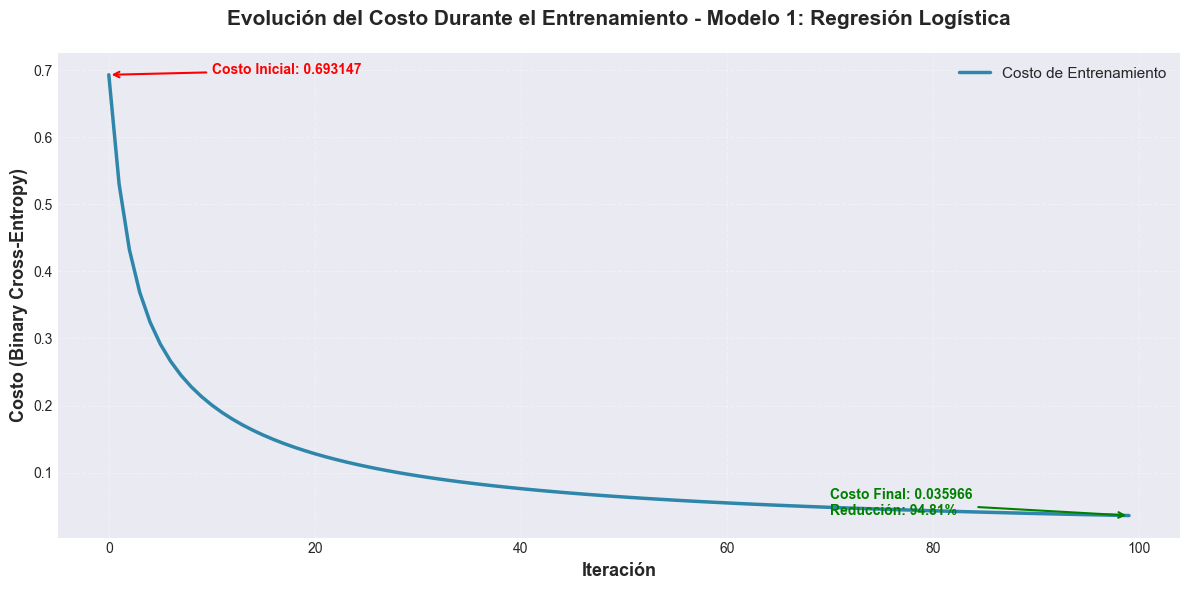


RESUMEN DE CONVERGENCIA
Costo Inicial:  0.693147
Costo Final:    0.035966
Reducción:      0.657181 (94.81%)


In [48]:
# ====================================================================================================
# FIGURA 1: CONVERGENCIA DEL MODELO - EVOLUCIÓN DEL COSTO
# ====================================================================================================

plt.figure(figsize=(12, 6))
plt.plot(range(iteraciones), costos_logistic, linewidth=2.5, color='#2E86AB', label='Costo de Entrenamiento')
plt.xlabel('Iteración', fontsize=13, fontweight='bold')
plt.ylabel('Costo (Binary Cross-Entropy)', fontsize=13, fontweight='bold')
plt.title('Evolución del Costo Durante el Entrenamiento - Modelo 1: Regresión Logística',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')

# Añadir anotaciones
costo_inicial = costos_logistic[0]
costo_final = costos_logistic[-1]
reduccion_pct = ((costo_inicial - costo_final) / costo_inicial) * 100

plt.annotate(f'Costo Inicial: {costo_inicial:.6f}',
             xy=(0, costo_inicial), xytext=(10, costo_inicial + 0.0005),
             fontsize=10, color='red', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.annotate(f'Costo Final: {costo_final:.6f}\nReducción: {reduccion_pct:.2f}%',
             xy=(iteraciones-1, costo_final), xytext=(iteraciones-30, costo_final + 0.0010),
             fontsize=10, color='green', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

plt.tight_layout()
plt.show()

print(f"\n{'='*100}")
print(f"RESUMEN DE CONVERGENCIA")
print(f"{'='*100}")
print(f"Costo Inicial:  {costo_inicial:.6f}")
print(f"Costo Final:    {costo_final:.6f}")
print(f"Reducción:      {costo_inicial - costo_final:.6f} ({reduccion_pct:.2f}%)")
print(f"{'='*100}")

### Evaluación del Modelo 1

In [49]:
print("=" * 80)
print("EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 80)

# Evaluar en conjunto de entrenamiento
print("\n Evaluación en conjunto de ENTRENAMIENTO:")
error_train, Y_train_pred = evaluar_modelo(W_logistic, Xtrain, Ytrain)
metricas_train = metricas_clasificacion(Ytrain, Y_train_pred)

print(f"  Error de clasificación: {error_train:.4f} ({error_train*100:.2f}%)")
for metrica, valor in metricas_train.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Evaluar en conjunto de prueba
print("\n🎯 Evaluación en conjunto de PRUEBA:")
error_test, Y_test_pred = evaluar_modelo(W_logistic, Xtest, Ytest)
metricas_test = metricas_clasificacion(Ytest, Y_test_pred)

print(f"  Error de clasificación: {error_test:.4f} ({error_test*100:.2f}%)")
for metrica, valor in metricas_test.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Análisis de sobreajuste
print("\n" + "=" * 80)
print("ANÁLISIS DE SOBREAJUSTE")
print("=" * 80)

gap_accuracy = metricas_train['Accuracy'] - metricas_test['Accuracy']
print(f"\nDiferencia Train-Test (Accuracy): {gap_accuracy:.4f}")

if gap_accuracy < 0.02:
    print("✓ Excelente generalización (gap < 2%)")
elif gap_accuracy < 0.05:
    print("✓ Buena generalización (gap < 5%)")
else:
    print(" Posible sobreajuste (gap > 5%)")

EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA

 Evaluación en conjunto de ENTRENAMIENTO:
  Error de clasificación: 0.0230 (2.30%)
  Accuracy: 0.9770
  Precision: 0.9550
  Recall: 1.0000
  F1-Score: 0.9770

🎯 Evaluación en conjunto de PRUEBA:
  Error de clasificación: 0.0185 (1.85%)
  Accuracy: 0.9815
  Precision: 0.9626
  Recall: 0.9991
  F1-Score: 0.9805

ANÁLISIS DE SOBREAJUSTE

Diferencia Train-Test (Accuracy): -0.0046
✓ Excelente generalización (gap < 2%)


In [50]:


print("=" * 80)
print("ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (CON VALIDACIÓN CRUZADA)")
print("=" * 80)

# 1. Configuración
iteraciones = 100
eta = 0.1
n_folds = 4
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para guardar las métricas de cada fold
acc_train_scores = []
acc_val_scores = []

print(f"\nIniciando validación cruzada de {n_folds} folds...")

# 2. Bucle de Validación Cruzada
# Nota: Usamos Xtrain y Ytrain (el 70% original) para hacer la validación interna
for fold, (train_index, val_index) in enumerate(skf.split(Xtrain, Ytrain.ravel())):
    # Separar datos para este fold
    X_train_fold, X_val_fold = Xtrain[train_index], Xtrain[val_index]
    y_train_fold, y_val_fold = Ytrain[train_index], Ytrain[val_index]

    # Entrenar modelo manual en este fold
    W_fold, _ = gradiente_descendente_logistic(
        X_train_fold, y_train_fold, eta=eta, iteraciones=iteraciones
    )

    # Evaluar en entrenamiento (del fold)
    _, Y_pred_train_fold = evaluar_modelo(W_fold, X_train_fold, y_train_fold)
    metrics_train = metricas_clasificacion(y_train_fold, Y_pred_train_fold)
    acc_train_scores.append(metrics_train['Accuracy'])

    # Evaluar en validación (del fold)
    _, Y_pred_val_fold = evaluar_modelo(W_fold, X_val_fold, y_val_fold)
    metrics_val = metricas_clasificacion(y_val_fold, Y_pred_val_fold)
    acc_val_scores.append(metrics_val['Accuracy'])

    print(f"  Fold {fold+1}: Train Acc={metrics_train['Accuracy']:.4f} | Val Acc={metrics_val['Accuracy']:.4f}")

# 3. Calcular Promedios y Desviación Estándar
mean_acc_train = np.mean(acc_train_scores)
std_acc_train = np.std(acc_train_scores)
mean_acc_val = np.mean(acc_val_scores)
std_acc_val = np.std(acc_val_scores)

print("-" * 80)
print(f"RESULTADOS VALIDACIÓN CRUZADA (Promedio ± Std):")
print(f"  Accuracy Entrenamiento: {mean_acc_train:.4f} ± {std_acc_train:.4f}")
print(f"  Accuracy Validación:    {mean_acc_val:.4f} ± {std_acc_val:.4f}")
print("-" * 80)

# 4. Entrenamiento Final (Para evaluación en Test Set y Gráficas)
print("\nEntrenando modelo final con TODOS los datos de entrenamiento...")
W_logistic, costos_logistic = gradiente_descendente_logistic(
    Xtrain, Ytrain, eta=eta, iteraciones=iteraciones
)
print("✓ Modelo final entrenado exitosamente.")

ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (CON VALIDACIÓN CRUZADA)

Iniciando validación cruzada de 4 folds...
Costo inicial: 0.6931
Costo final (iteración 100): 0.0357
Reducción del costo: 0.6575
  Fold 1: Train Acc=0.9777 | Val Acc=0.9733
Costo inicial: 0.6931
Costo final (iteración 100): 0.0361
Reducción del costo: 0.6570
  Fold 2: Train Acc=0.9749 | Val Acc=0.9761
Costo inicial: 0.6931
Costo final (iteración 100): 0.0354
Reducción del costo: 0.6578
  Fold 3: Train Acc=0.9768 | Val Acc=0.9775
Costo inicial: 0.6931
Costo final (iteración 100): 0.0362
Reducción del costo: 0.6570
  Fold 4: Train Acc=0.9759 | Val Acc=0.9726
--------------------------------------------------------------------------------
RESULTADOS VALIDACIÓN CRUZADA (Promedio ± Std):
  Accuracy Entrenamiento: 0.9763 ± 0.0010
  Accuracy Validación:    0.9749 ± 0.0020
--------------------------------------------------------------------------------

Entrenando modelo final con TODOS los datos de entrenamiento...
Costo 

### Matriz de Confusión

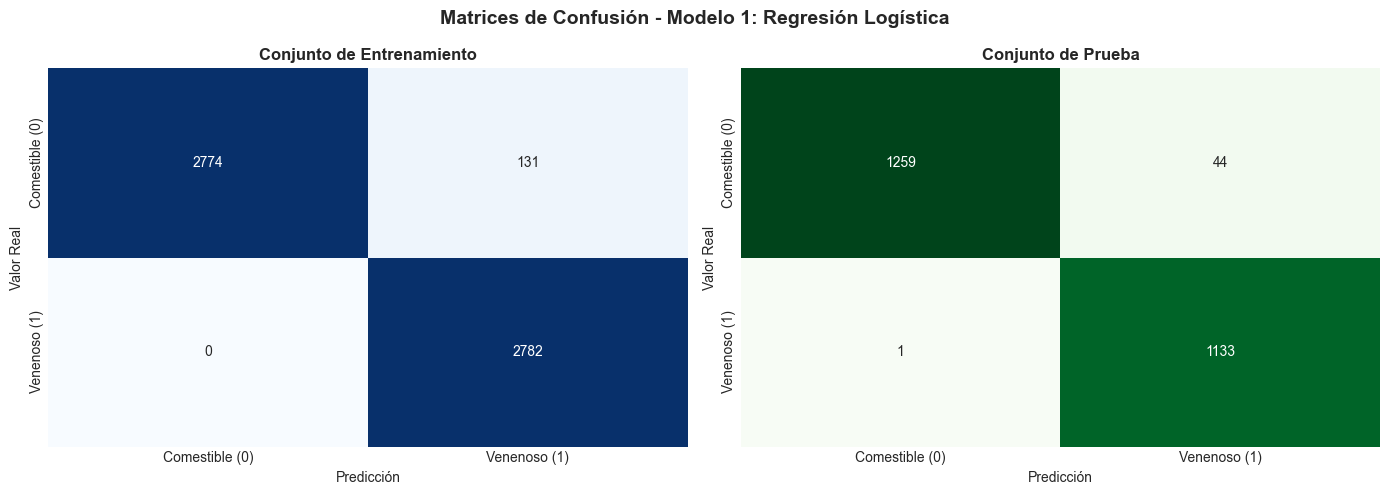


 ANÁLISIS CRÍTICO:
  Falsos Negativos (venenoso → comestible): 1 casos
  Falsos Positivos (comestible → venenoso): 44 casos

  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)
  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles


In [51]:
# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Matrices de Confusión - Modelo 1: Regresión Logística',
             fontsize=14, fontweight='bold')

# Matriz de confusión - Entrenamiento
sns.heatmap(metricas_train['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues',
            ax=axes[0], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[0].set_title('Conjunto de Entrenamiento', fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

# Matriz de confusión - Prueba
sns.heatmap(metricas_test['Confusion_Matrix'], annot=True, fmt='d', cmap='Greens',
            ax=axes[1], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[1].set_title('Conjunto de Prueba', fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
cm = metricas_test['Confusion_Matrix']
fn = cm[1, 0]  # Falsos Negativos (venenoso clasificado como comestible) - MUY PELIGROSO
fp = cm[0, 1]  # Falsos Positivos (comestible clasificado como venenoso) - Desperdicio

print("\n ANÁLISIS CRÍTICO:")
print(f"  Falsos Negativos (venenoso → comestible): {fn} casos")
print(f"  Falsos Positivos (comestible → venenoso): {fp} casos")
print(f"\n  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)")
print(f"  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles")

---

### Visualización de Resultados - Modelo 1: Regresión Logística



#### Figura 1: Métricas de Desempeño - Comparación Train vs Test

Esta gráfica compara las métricas de desempeño (Accuracy, Precision, Recall, F1-Score) entre el conjunto de entrenamiento y el conjunto de prueba, evidenciando la capacidad de generalización del modelo.

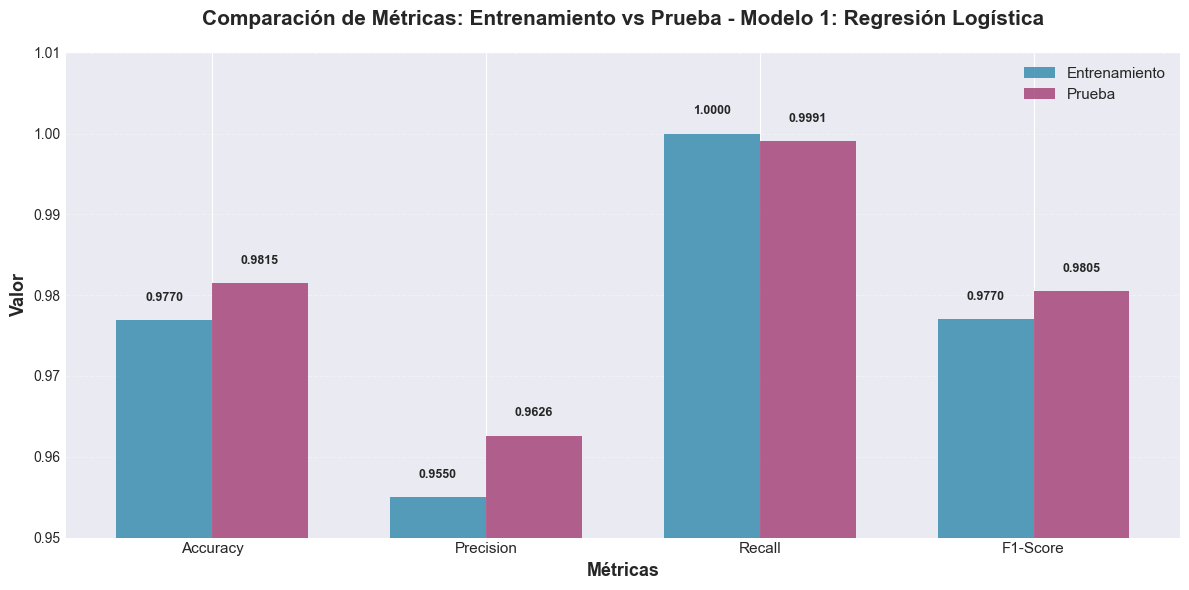


COMPARACIÓN TRAIN VS TEST
Accuracy    : Train=0.9770, Test=0.9815, Gap=-0.0046
Precision   : Train=0.9550, Test=0.9626, Gap=-0.0076
Recall      : Train=1.0000, Test=0.9991, Gap=0.0009
F1-Score    : Train=0.9770, Test=0.9805, Gap=-0.0035


In [52]:
# ====================================================================================================
# FIGURA 2: MÉTRICAS DE DESEMPEÑO - COMPARACIÓN TRAIN VS TEST
# ====================================================================================================

metricas_nombres = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
valores_train = [
    metricas_train['Accuracy'],
    metricas_train['Precision'],
    metricas_train['Recall'],
    metricas_train['F1-Score']
]
valores_test = [
    metricas_test['Accuracy'],
    metricas_test['Precision'],
    metricas_test['Recall'],
    metricas_test['F1-Score']
]

x_pos = np.arange(len(metricas_nombres))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x_pos - width/2, valores_train, width, label='Entrenamiento', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, valores_test, width, label='Prueba', color='#A23B72', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=13, fontweight='bold')
ax.set_ylabel('Valor', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Métricas: Entrenamiento vs Prueba - Modelo 1: Regresión Logística',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(metricas_nombres, fontsize=11)
ax.set_ylim([0.95, 1.01])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*100}")
print(f"COMPARACIÓN TRAIN VS TEST")
print(f"{'='*100}")
for i, metrica in enumerate(metricas_nombres):
    diff = valores_train[i] - valores_test[i]
    print(f"{metrica:12s}: Train={valores_train[i]:.4f}, Test={valores_test[i]:.4f}, Gap={diff:.4f}")
print(f"{'='*100}")

## 4.2 Modelo 2 — k-Vecinos Más Cercanos (KNN)

En este apartado implementamos el clasificador K-Vecinos siguiendo la metodología de la cátedra: escalado, búsqueda de hiperparámetros por validación cruzada, evaluación con métricas y visualizaciones (2D y 3D).

In [53]:
print('='*100)
print('MODELO 2: K-VECINOS MÁS CERCANOS (KNN)')
print('='*100)

# ========================================
# IMPORTS NECESARIOS
# ========================================
from scipy.stats import mode
from scipy.spatial.distance import cdist

# ========================================
# FUNCIONES AUXILIARES
# ========================================

def ErrorClas(Y_lest, Y):
    """Función que calcula el error de clasificación
    Y_lest: numpy array con las predicciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)
    return error


def train_test_split_fix(X, y, test_size=0.2, random_state=0):
    """Función que divide el conjunto de datos en
    entrenamiento y pruebas usando una proporción
    fija de 20 % (test_size) para el conjunto de pruebas.
    Fije la semilla en cero para que los resultados sean
    reproducibles.

    X: matriz de numpy con las muestras y características
    y: matriz de numpy con los valores de las etiquetas reales
    retorna:
        Xtrain: conjunto de datos para entrenamiento
        Xtest: conjunto de datos para pruebas
        Ytrain: conjunto  de etiquetas para entrenamiento
        Ytest: conjunto de etiquetas para prueba
    """
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return (X_train, X_test, y_train, y_test)


def knn_clasificacion(k, X_train, Y_train, X_test):
    """Función que implementa el modelo de K-Vecino más cercanos
    para clasificación

    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida para cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación

    retorna: las estimaciones del modelo KNN para el conjunto X_test
            esta matriz debe tener un shape de [row/muestras de X_test]
            y las distancias de X_test respecto a X_train, esta matriz
            debe tener un shape de [rows de X_test, rows X_train]
            lo que es lo mismo [muestras de X_test, muestras de X_train]
    """
    if k > X_train.shape[0]:
        print("k no puede ser menor que las muestras de entrenamiento")
        return(None)

    distancias = cdist(X_test, X_train, metric='euclidean')
    Yest = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        vecinos_sorted = np.argsort(distancias[i])[:k]
        Yest[i] = mode(Y_train[vecinos_sorted], axis=None, keepdims=False)[0]

    return (Yest, distancias)


def experimentar(ks, X, Y):
    """Función que realiza los experimentos con knn usando
    una estrategia de validación entrenamiento y pruebas

    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y características
    Y: vector de numpy con los valores de las etiquetas

    retorna: dataframe con los resultados
    """
    from sklearn.preprocessing import StandardScaler

    # dividimos usando la función
    Xtrain, Xtest, Ytrain, Ytest = train_test_split_fix(X, Y, test_size=0.2, random_state=0)

    # se llama el objeto
    scaler = StandardScaler()
    # Se calculan los parametros
    scaler.fit(Xtrain)
    # se usa el objeto con los parametros calculados
    # realizar la normalización
    Xtrain= scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    resultados = pd.DataFrame()
    idx = 0
    for k in ks:
        # iteramos sobre la lista de k's
        # se ingresan al dataframe con los resultados
        resultados.loc[idx,'k-vecinos'] = k
        Yest, dist = knn_clasificacion (k, Xtrain, Ytrain, Xtest)
        resultados.loc[idx,'error de prueba'] = ErrorClas(Yest, Ytest)
        idx+=1

    return (resultados)

# ========================================
# EXPERIMENTOS KNN
# ========================================

print('\n  Parámetros a evaluar:')
# Probamos diferentes valores de k
ks = [3, 5, 7, 11, 15, 21, 31, 41, 51]
print(f'  - Valores de k: {ks}')
print(f'  - Total experimentos: {len(ks)}')
print(f'  - Usando One-Hot Encoding ({X_onehot.shape[1]} features) - requerido para KNN')

print('\n  Ejecutando experimentos...')
resultados_knn = experimentar(ks, X_onehot.values, y_encoded)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS KNN')
print('='*100)
print(resultados_knn.to_string(index=False))

# Encontrar el mejor k (menor error)
idx_mejor = resultados_knn['error de prueba'].idxmin()
mejor_k = int(resultados_knn.loc[idx_mejor, 'k-vecinos'])
mejor_error = resultados_knn.loc[idx_mejor, 'error de prueba']

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN')
print('='*100)
print(f'Mejor k: {mejor_k}')
print(f'Error de prueba: {mejor_error:.4f}')
print(f'Accuracy: {1-mejor_error:.4f} ({(1-mejor_error)*100:.2f}%)')

# ========================================
# ENTRENAMIENTO CON VALIDACIÓN CRUZADA (StratifiedKFold)
# PARA TODOS LOS VALORES DE K - Para generar curvas de validación
# ========================================

print('\n' + '='*100)
print('VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) PARA TODOS LOS VALORES DE K')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Estructura para guardar resultados de CV para TODOS los k valores
resultados_cv_por_k = {
    'k': [],
    'train_acc_mean': [],
    'train_acc_std': [],
    'test_acc_mean': [],
    'test_acc_std': [],
    'train_error_mean': [],
    'train_error_std': [],
    'test_error_mean': [],
    'test_error_std': []
}

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

print(f'\nEvaluando TODOS los valores de k: {ks}')
print(f'Esto permitirá generar curvas de validación con intervalos de confianza\n')

for k in ks:
    acc_train_folds = []
    acc_test_folds = []
    error_train_folds = []
    error_test_folds = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_onehot.values, y_encoded), 1):
        # Dividir datos
        X_train_fold = X_onehot.values[train_idx]
        X_test_fold = X_onehot.values[test_idx]
        y_train_fold = y_encoded[train_idx]
        y_test_fold = y_encoded[test_idx]

        # Escalar
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)

        # Entrenar y predecir con k actual
        Y_train_pred, _ = knn_clasificacion(k, X_train_scaled, y_train_fold, X_train_scaled)
        Y_test_pred, _ = knn_clasificacion(k, X_train_scaled, y_train_fold, X_test_scaled)

        # Calcular métricas
        error_train = ErrorClas(Y_train_pred, y_train_fold)
        error_test = ErrorClas(Y_test_pred, y_test_fold)
        acc_train = 1 - error_train
        acc_test = 1 - error_test

        acc_train_folds.append(acc_train)
        acc_test_folds.append(acc_test)
        error_train_folds.append(error_train)
        error_test_folds.append(error_test)

    # Calcular promedio y desviación estándar para este k
    resultados_cv_por_k['k'].append(k)
    resultados_cv_por_k['train_acc_mean'].append(np.mean(acc_train_folds))
    resultados_cv_por_k['train_acc_std'].append(np.std(acc_train_folds))
    resultados_cv_por_k['test_acc_mean'].append(np.mean(acc_test_folds))
    resultados_cv_por_k['test_acc_std'].append(np.std(acc_test_folds))
    resultados_cv_por_k['train_error_mean'].append(np.mean(error_train_folds))
    resultados_cv_por_k['train_error_std'].append(np.std(error_train_folds))
    resultados_cv_por_k['test_error_mean'].append(np.mean(error_test_folds))
    resultados_cv_por_k['test_error_std'].append(np.std(error_test_folds))

    print(f"k={k:2d}: Train Acc={np.mean(acc_train_folds):.4f}±{np.std(acc_train_folds):.4f}, "
          f"Test Acc={np.mean(acc_test_folds):.4f}±{np.std(acc_test_folds):.4f}")

# Extraer estadísticas del mejor k para compatibilidad con código existente
idx_mejor_cv = ks.index(mejor_k)
errores_train = error_train_folds  # Los del último k evaluado serán reemplazados
errores_test = error_test_folds    # Los del último k evaluado serán reemplazados
mean_error_train = resultados_cv_por_k['train_error_mean'][idx_mejor_cv]
std_error_train = resultados_cv_por_k['train_error_std'][idx_mejor_cv]
mean_error_test = resultados_cv_por_k['test_error_mean'][idx_mejor_cv]
std_error_test = resultados_cv_por_k['test_error_std'][idx_mejor_cv]

print('\n' + '='*100)
print(f'RESULTADOS VALIDACIÓN CRUZADA PARA MEJOR K (k={mejor_k})')
print('='*100)
print(f'Error promedio entrenamiento: {mean_error_train:.6f} ± {std_error_train:.6f}')
print(f'Error promedio prueba:        {mean_error_test:.6f} ± {std_error_test:.6f}')
print(f'Accuracy promedio entrenamiento: {1-mean_error_train:.6f} ({(1-mean_error_train)*100:.4f}%)')
print(f'Accuracy promedio prueba:        {1-mean_error_test:.6f} ({(1-mean_error_test)*100:.4f}%)')
print(f'Gap (Train-Test):                {abs(mean_error_train - mean_error_test):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO COMPLETO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('EVALUACIÓN EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Entrenar con datos One-Hot Encoding (Xtrain_onehot, Xtest_onehot)
scaler_knn = StandardScaler()
Xtrain_knn = scaler_knn.fit_transform(Xtrain_onehot)
Xtest_knn = scaler_knn.transform(Xtest_onehot)

# Entrenar KNN con mejor k
Y_test_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtest_knn)
Y_train_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtrain_knn)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_knn = 1 - ErrorClas(Y_train_pred_knn, Ytrain.ravel())
acc_test_knn = 1 - ErrorClas(Y_test_pred_knn, Ytest.ravel())
prec_knn = precision_score(Ytest, Y_test_pred_knn, zero_division=0)
rec_knn = recall_score(Ytest, Y_test_pred_knn, zero_division=0)
f1_knn = f1_score(Ytest, Y_test_pred_knn, zero_division=0)
cm_knn = confusion_matrix(Ytest, Y_test_pred_knn)

print(f'Accuracy Train: {acc_train_knn:.4f} ({acc_train_knn*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_knn:.4f} ({acc_test_knn*100:.2f}%)')
print(f'Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1-score: {f1_knn:.4f}')
print(f'\nConfusion Matrix:\n{cm_knn}')

# Guardar resultados
knn_results = {
    'mejor_k': mejor_k,
    'error_cv_mean': mean_error_test,
    'error_cv_std': std_error_test,
    'acc_train': acc_train_knn,
    'acc_test': acc_test_knn,
    'precision': prec_knn,
    'recall': rec_knn,
    'f1': f1_knn,
    'y_pred': Y_test_pred_knn,
    'confusion_matrix': cm_knn,
    'resultados_experimentos': resultados_knn
}

print('\n✓ Modelo 2 (KNN) completado.')
print('  Variables: mejor_k, resultados_knn, knn_results, Y_test_pred_knn')
# ========================================
# IMPRIMIR RESULTADOS PARA LA TABLA
# ========================================

print('\n' + '='*60)
print(f'DATOS PARA LA TABLA: MODELO k-NN (k={mejor_k})')
print('='*60)

# Formato lista vertical (para leer fácil)
print(f"1. Accuracy:         {acc_test_knn:.4f}")
print(f"2. Precisión (ven.): {prec_knn:.4f}")
print(f"3. Recall (ven.):    {rec_knn:.4f}")
print(f"4. F1 (ven.):        {f1_knn:.4f}")

print('-'*60)
# Formato fila (para copiar directo a tu informe)
print("Fila sugerida:")
print(f"k-NN | {acc_test_knn:.4f} | {prec_knn:.4f} | {rec_knn:.4f} | {f1_knn:.4f}")
print('='*60)


MODELO 2: K-VECINOS MÁS CERCANOS (KNN)

  Parámetros a evaluar:
  - Valores de k: [3, 5, 7, 11, 15, 21, 31, 41, 51]
  - Total experimentos: 9
  - Usando One-Hot Encoding (117 features) - requerido para KNN

  Ejecutando experimentos...

RESULTADOS EXPERIMENTOS KNN
 k-vecinos  error de prueba
       3.0         0.000000
       5.0         0.000000
       7.0         0.000000
      11.0         0.000000
      15.0         0.000000
      21.0         0.000000
      31.0         0.000000
      41.0         0.000615
      51.0         0.001846

MEJOR CONFIGURACIÓN
Mejor k: 3
Error de prueba: 0.0000
Accuracy: 1.0000 (100.00%)

VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) PARA TODOS LOS VALORES DE K

Evaluando TODOS los valores de k: [3, 5, 7, 11, 15, 21, 31, 41, 51]
Esto permitirá generar curvas de validación con intervalos de confianza


RESULTADOS EXPERIMENTOS KNN
 k-vecinos  error de prueba
       3.0         0.000000
       5.0         0.000000
       7.0         0.000000
      11.0 

---

### Visualización de Resultados - Modelo 2: k-NN

#### Figura 1: Curva de Validación - Efecto del Hiperparámetro k

Esta gráfica muestra cómo el valor de k afecta el desempeño del modelo k-NN. Se presentan curvas de entrenamiento y validación con intervalos de confianza (sombreado = promedio ± desviación estándar calculada mediante StratifiedKFold con 4 folds). El "codo" o punto óptimo indica el mejor balance entre sesgo y varianza.

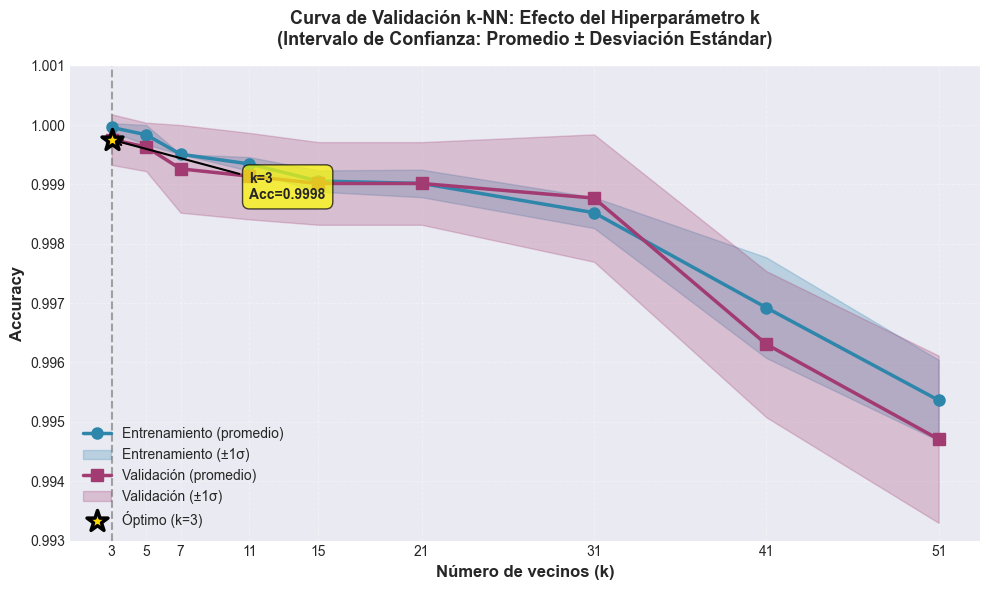


INTERPRETACIÓN DE LA CURVA DE VALIDACIÓN
✓ Comportamiento Train: Decrece con k (de 1.0000 a 0.9954)
✓ Comportamiento Validation: Forma de 'U' invertida, máximo en k=3
✓ Mejor k encontrado: 3 (Accuracy validación = 0.9998 ± 0.0004)
✓ Trade-off sesgo-varianza: k muy bajo → sobreajuste, k muy alto → subajuste


In [54]:
# ====================================================================================================
# FIGURA 1: CURVA DE VALIDACIÓN CON INTERVALOS DE CONFIANZA
# ====================================================================================================
# Usar resultados de CV ya calculados en resultados_cv_por_k

plt.figure(figsize=(10, 6))

# Extraer datos de resultados_cv_por_k (ya calculados durante el entrenamiento)
ks = resultados_cv_por_k['k']
train_mean = np.array(resultados_cv_por_k['train_acc_mean'])
train_std = np.array(resultados_cv_por_k['train_acc_std'])
test_mean = np.array(resultados_cv_por_k['test_acc_mean'])
test_std = np.array(resultados_cv_por_k['test_acc_std'])

# Línea de entrenamiento
plt.plot(ks, train_mean, 'o-', color='#2E86AB', linewidth=2.5,
         markersize=8, label='Entrenamiento (promedio)', zorder=3)

# Intervalo de confianza para entrenamiento (sombreado)
plt.fill_between(ks, train_mean - train_std, train_mean + train_std,
                 alpha=0.25, color='#2E86AB', label='Entrenamiento (±1σ)')

# Línea de validación
plt.plot(ks, test_mean, 's-', color='#A23B72', linewidth=2.5,
         markersize=8, label='Validación (promedio)', zorder=3)

# Intervalo de confianza para validación (sombreado)
plt.fill_between(ks, test_mean - test_std, test_mean + test_std,
                 alpha=0.25, color='#A23B72', label='Validación (±1σ)')

# Marcar el mejor k (mayor accuracy en validación)
idx_mejor = np.argmax(test_mean)
mejor_k_grafica = ks[idx_mejor]
mejor_acc = test_mean[idx_mejor]

plt.axvline(x=mejor_k_grafica, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, zorder=1)
plt.scatter([mejor_k_grafica], [mejor_acc], s=250, color='gold', edgecolors='black',
            linewidths=2.5, marker='*', label=f'Óptimo (k={mejor_k_grafica})', zorder=4)

# Anotación del punto óptimo
plt.annotate(f'k={mejor_k_grafica}\nAcc={mejor_acc:.4f}',
             xy=(mejor_k_grafica, mejor_acc),
             xytext=(mejor_k_grafica + 8, mejor_acc - 0.0010),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Configuración de ejes
plt.xlabel('Número de vecinos (k)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Curva de Validación k-NN: Efecto del Hiperparámetro k\n(Intervalo de Confianza: Promedio ± Desviación Estándar)',
          fontsize=13, fontweight='bold', pad=15)

plt.xticks(ks, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
plt.legend(loc='lower left', fontsize=10, framealpha=0.95)

plt.ylim([0.993, 1.001])
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("INTERPRETACIÓN DE LA CURVA DE VALIDACIÓN")
print("="*100)
print(f"✓ Comportamiento Train: Decrece con k (de {train_mean[0]:.4f} a {train_mean[-1]:.4f})")
print(f"✓ Comportamiento Validation: Forma de 'U' invertida, máximo en k={mejor_k_grafica}")
print(f"✓ Mejor k encontrado: {mejor_k_grafica} (Accuracy validación = {mejor_acc:.4f} ± {test_std[idx_mejor]:.4f})")
print(f"✓ Trade-off sesgo-varianza: k muy bajo → sobreajuste, k muy alto → subajuste")
print("="*100)

## 4.3 Random Forest (Ensemble de Árboles de Decisión)

In [55]:
# --- Implementación Modelo 3: Random Forest
# experimentar_rf con StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

def experimentar_rf(X, Y, num_trees, numero_de_variables):
    """función que realiza experimentos con el modelo random forest
    X: matriz con las características
    Y: matriz de numpy con etiquetas
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo
    retorna: dataframe con:
        - numero de arboles usados
        - variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviación de estandar de la eficiencia de entrenamiento
        - eficiencia de prueba
        - desviación estandar de la eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            for train, test in skf.split(X, Y):
                Xtrain_fold = X[train, :]
                Ytrain_fold = Y[train]
                Xtest_fold = X[test, :]
                Ytest_fold = Y[test]

                # Crear y entrenar el modelo Random Forest
                # Configuramos min_samples_leaf=3
                modelo = RandomForestClassifier(
                    n_estimators=trees,
                    max_features=num_variables,
                    random_state=42,
                    min_samples_leaf=3,
                    criterion='gini'
                )
                modelo.fit(Xtrain_fold, Ytrain_fold.ravel())

                # Predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain_fold)
                # Predecir muestras de pruebas
                Yest = modelo.predict(Xtest_fold)

                # Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain_fold.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest_fold.ravel()))

            resultados.loc[idx, 'número de arboles'] = trees
            resultados.loc[idx, 'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx, 'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx, 'desviacion estandar prueba'] = np.std(EficienciaVal)
            idx = idx + 1
        print(f"✓ Completado para {trees} arboles")

    return resultados

# Verificar que tenemos los datos
try:
    Xtrain.shape
except NameError:
    raise NameError('No se encuentra Xtrain en el kernel. Ejecuta las celdas previas.')

print('='*80)
print('MODELO 3: RANDOM FOREST')
print('='*80)
print('Siguiendo metodología StratifiedKFold (4 folds)\n')

# Definir parámetros a experimentar
arboles = [50, 100, 150, 200]
variables_seleccion = [5, 10, 15, 20]  # max_features

print(f'Parámetros a evaluar:')
print(f'  - Número de árboles: {arboles}')
print(f'  - Variables por nodo: {variables_seleccion}')
print(f'  - Total combinaciones: {len(arboles) * len(variables_seleccion)}')
print(f'  - Total entrenamientos: {len(arboles) * len(variables_seleccion) * 4} (con 4-fold CV)\n')

# Ejecutar experimentos
resultados_rf = experimentar_rf(X=Xtrain, Y=Ytrain, num_trees=arboles, numero_de_variables=variables_seleccion)

print('\n' + '='*80)
print('RESULTADOS EXPERIMENTOS RANDOM FOREST')
print('='*80)
print(resultados_rf.to_string(index=False))

# Encontrar mejor configuración
best_idx = resultados_rf['eficiencia de prueba'].idxmax()
best_config = resultados_rf.loc[best_idx]

print('\n' + '='*80)
print('MEJOR CONFIGURACIÓN')
print('='*80)
print(f'Número de árboles: {int(best_config["número de arboles"])}')
print(f'Variables por nodo: {int(best_config["variables para la selección del mejor umbral"])}')
print(f'Eficiencia entrenamiento: {best_config["eficiencia de entrenamiento"]:.4f}')
print(f'Eficiencia prueba: {best_config["eficiencia de prueba"]:.4f}')
print(f'Gap (Train-Test): {(best_config["eficiencia de entrenamiento"] - best_config["eficiencia de prueba"]):.4f}')

# Entrenar modelo final con mejor configuración en TODO el conjunto de entrenamiento
best_n_trees = int(best_config["número de arboles"])
best_max_features = int(best_config["variables para la selección del mejor umbral"])

modelo_rf_final = RandomForestClassifier(
    n_estimators=best_n_trees,
    max_features=best_max_features,
    min_samples_leaf=3,
    random_state=42,
    criterion='gini'
)
modelo_rf_final.fit(Xtrain, Ytrain.ravel())

# Evaluar en conjunto de test
Y_test_pred_rf = modelo_rf_final.predict(Xtest)
Y_train_pred_rf = modelo_rf_final.predict(Xtrain)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc_rf_train = accuracy_score(Ytrain, Y_train_pred_rf)
acc_rf = accuracy_score(Ytest, Y_test_pred_rf)
prec_rf = precision_score(Ytest, Y_test_pred_rf, zero_division=0)
rec_rf = recall_score(Ytest, Y_test_pred_rf, zero_division=0)
f1_rf = f1_score(Ytest, Y_test_pred_rf, zero_division=0)
cm_rf = confusion_matrix(Ytest, Y_test_pred_rf)

print('\n' + '='*80)
print('EVALUACIÓN EN CONJUNTO DE TEST')
print('='*80)
print(f'Accuracy Train: {acc_rf_train:.4f} ({acc_rf_train*100:.2f}%)')
print(f'Accuracy Test:  {acc_rf:.4f} ({acc_rf*100:.2f}%)')
print(f'Precision: {prec_rf:.4f}')
print(f'Recall:    {rec_rf:.4f}')
print(f'F1-score:  {f1_rf:.4f}')
print(f'\nGap (Train-Test): {(acc_rf_train - acc_rf):.4f}')

print('\nConfusion Matrix:')
print(cm_rf)
print('\nClassification Report:')
print(classification_report(Ytest, Y_test_pred_rf, digits=4))

# Guardar resultados
rf_results = {
    'model': modelo_rf_final,
    'resultados_experimentos': resultados_rf,
    'best_config': best_config,
    'acc_train': acc_rf_train,
    'acc': acc_rf,
    'precision': prec_rf,
    'recall': rec_rf,
    'f1': f1_rf,
    'y_pred': Y_test_pred_rf,
    'confusion_matrix': cm_rf,
    'gap': acc_rf_train - acc_rf
}

print('\n✓ Modelo 3 (Random Forest) entrenado. Variables: `modelo_rf_final`, `resultados_rf`, `rf_results`')

MODELO 3: RANDOM FOREST
Siguiendo metodología StratifiedKFold (4 folds)

Parámetros a evaluar:
  - Número de árboles: [50, 100, 150, 200]
  - Variables por nodo: [5, 10, 15, 20]
  - Total combinaciones: 16
  - Total entrenamientos: 64 (con 4-fold CV)

✓ Completado para 50 arboles
✓ Completado para 50 arboles
✓ Completado para 100 arboles
✓ Completado para 100 arboles
✓ Completado para 150 arboles
✓ Completado para 150 arboles
✓ Completado para 200 arboles

RESULTADOS EXPERIMENTOS RANDOM FOREST
 número de arboles  variables para la selección del mejor umbral  eficiencia de entrenamiento  desviacion estandar entrenamiento  eficiencia de prueba  desviacion estandar prueba
              50.0                                           5.0                     0.999766                           0.000287              0.999297                    0.000703
              50.0                                          10.0                     1.000000                           0.000000              0

---

### Visualización de Resultados - Modelo 3: Random Forest

#### Figura 1: Mapa de Calor - Efecto de Hiperparámetros en el Desempeño

Este mapa de calor visualiza cómo la combinación de número de árboles y variables por nodo afecta la accuracy de validación del modelo Random Forest. Los colores más claros indican mejor desempeño.

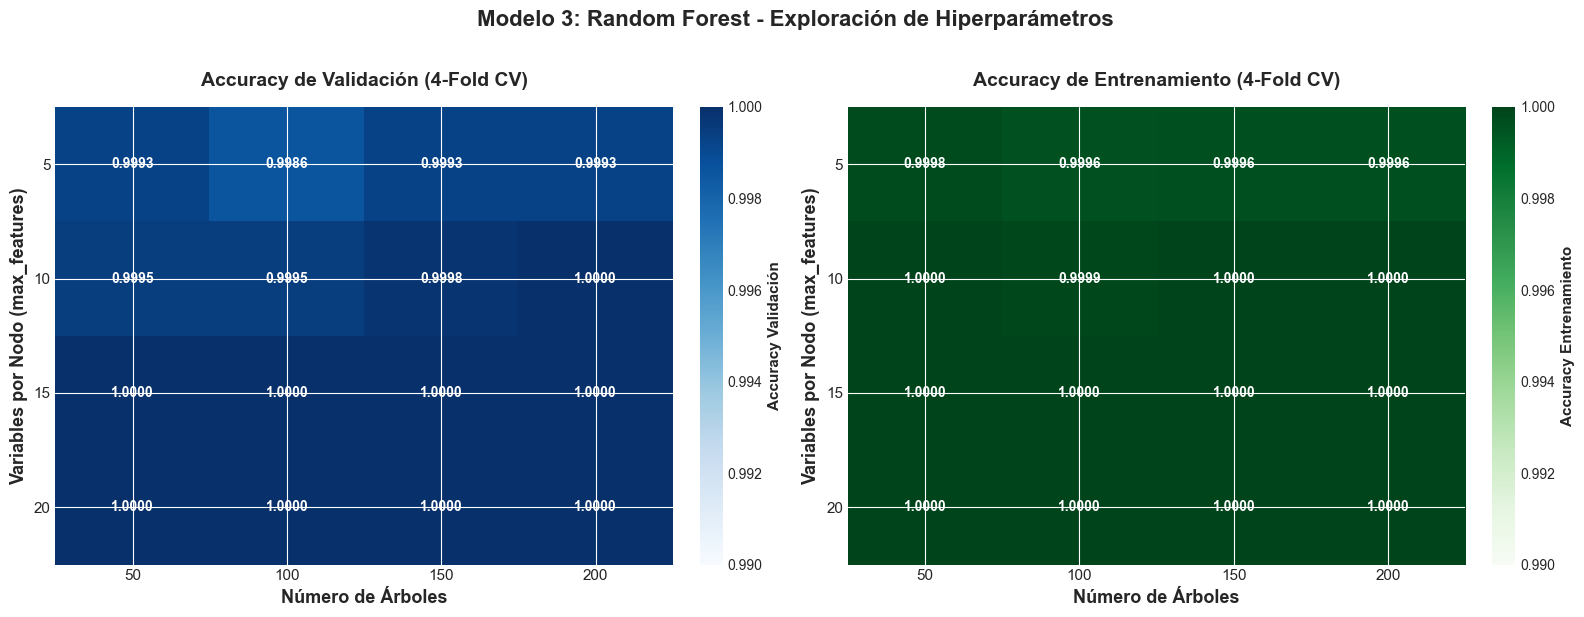


ANÁLISIS DEL MAPA DE CALOR - RANDOM FOREST

Rango de Accuracy Validación: [0.9986, 1.0000]
Rango de Accuracy Entrenamiento: [0.9996, 1.0000]
Diferencia máxima en validación: 0.001407

MEJOR CONFIGURACIÓN (según validación)
Número de Árboles: 200
Variables por Nodo: 10
Accuracy Validación: 1.0000 (100.00%)


In [56]:
# ====================================================================================================
# FIGURA 1: MAPA DE CALOR - EFECTO DE HIPERPARÁMETROS EN RANDOM FOREST
# ====================================================================================================

# Crear matriz pivote para el heatmap
pivot_test = resultados_rf.pivot(
    index='variables para la selección del mejor umbral',
    columns='número de arboles',
    values='eficiencia de prueba'
)

pivot_train = resultados_rf.pivot(
    index='variables para la selección del mejor umbral',
    columns='número de arboles',
    values='eficiencia de entrenamiento'
)

# Crear figura con 2 subplots (Train y Test)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap para VALIDACIÓN (Test) - Colores claros
im1 = axes[0].imshow(pivot_test.values, cmap='Blues', aspect='auto', vmin=0.99, vmax=1.0)
axes[0].set_xticks(np.arange(len(pivot_test.columns)))
axes[0].set_yticks(np.arange(len(pivot_test.index)))
axes[0].set_xticklabels([int(x) for x in pivot_test.columns], fontsize=11)
axes[0].set_yticklabels([int(x) for x in pivot_test.index], fontsize=11)
axes[0].set_xlabel('Número de Árboles', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Variables por Nodo (max_features)', fontsize=13, fontweight='bold')
axes[0].set_title('Accuracy de Validación (4-Fold CV)', fontsize=14, fontweight='bold', pad=15)

# Añadir valores en cada celda con color BLANCO para mejor contraste
for i in range(len(pivot_test.index)):
    for j in range(len(pivot_test.columns)):
        text = axes[0].text(j, i, f'{pivot_test.values[i, j]:.4f}',
                           ha="center", va="center", color="white", fontsize=10, fontweight='bold')

# Colorbar para validación
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label('Accuracy Validación', fontsize=11, fontweight='bold')

# Heatmap para ENTRENAMIENTO (Train) - Colores verdes
im2 = axes[1].imshow(pivot_train.values, cmap='Greens', aspect='auto', vmin=0.99, vmax=1.0)
axes[1].set_xticks(np.arange(len(pivot_train.columns)))
axes[1].set_yticks(np.arange(len(pivot_train.index)))
axes[1].set_xticklabels([int(x) for x in pivot_train.columns], fontsize=11)
axes[1].set_yticklabels([int(x) for x in pivot_train.index], fontsize=11)
axes[1].set_xlabel('Número de Árboles', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Variables por Nodo (max_features)', fontsize=13, fontweight='bold')
axes[1].set_title('Accuracy de Entrenamiento (4-Fold CV)', fontsize=14, fontweight='bold', pad=15)

# Añadir valores en cada celda con color BLANCO para mejor contraste
for i in range(len(pivot_train.index)):
    for j in range(len(pivot_train.columns)):
        text = axes[1].text(j, i, f'{pivot_train.values[i, j]:.4f}',
                           ha="center", va="center", color="white", fontsize=10, fontweight='bold')

# Colorbar para entrenamiento
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label('Accuracy Entrenamiento', fontsize=11, fontweight='bold')

plt.suptitle('Modelo 3: Random Forest - Exploración de Hiperparámetros',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Análisis estadístico
print(f"\n{'='*100}")
print(f"ANÁLISIS DEL MAPA DE CALOR - RANDOM FOREST")
print(f"{'='*100}")
print(f"\nRango de Accuracy Validación: [{pivot_test.values.min():.4f}, {pivot_test.values.max():.4f}]")
print(f"Rango de Accuracy Entrenamiento: [{pivot_train.values.min():.4f}, {pivot_train.values.max():.4f}]")
print(f"Diferencia máxima en validación: {pivot_test.values.max() - pivot_test.values.min():.6f}")

# Encontrar mejor configuración
mejor_idx = np.unravel_index(pivot_test.values.argmax(), pivot_test.shape)
mejor_arboles = pivot_test.columns[mejor_idx[1]]
mejor_variables = pivot_test.index[mejor_idx[0]]
mejor_acc = pivot_test.values[mejor_idx]

print(f"\n{'='*100}")
print(f"MEJOR CONFIGURACIÓN (según validación)")
print(f"{'='*100}")
print(f"Número de Árboles: {int(mejor_arboles)}")
print(f"Variables por Nodo: {int(mejor_variables)}")
print(f"Accuracy Validación: {mejor_acc:.4f} ({mejor_acc*100:.2f}%)")
print(f"{'='*100}")

---

## 4.4 Red Neuronal Artificial (MLP - Multi-Layer Perceptron)

Implementamos el modelo de Red Neuronal: función `experimentar_mlpc()` con validación cruzada StratifiedKFold (4 folds), explorando diferentes arquitecturas (capas ocultas y neuronas).

In [57]:
print('='*100)
print('MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)')
print('='*100)

# ========================================
# FUNCIÓN EXPERIMENTAR_MLPC
# ========================================

def experimentar_mlpc(X, Y, num_hidden_layers, num_neurons):
    """Función para realizar experimentos con el MLP Classifier

    X: matriz de numpy con las muestras de entrada [muestras,variables]
    Y: vector numpy con las variables a predecir (etiquetas)
    num_hidden_layers: list de enteros con el número de capas ocultas a usar
    num_neurons: list de enteros con el número de neuronas a usar

    Retorna: dataframe con 4 columnas:
        - número de capas, número de neuronas
        - promedio de error prueba (exactitud/eficiencia) de clasificación
        - desviación estándar
    """
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Validamos el modelo con StratifiedKFold (4 folds como en el laboratorio)
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=42)
    resultados = pd.DataFrame()
    idx = 0

    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            # Para almacenar errores intermedios
            Error_train = np.zeros(Folds)
            Error_test = np.zeros(Folds)

            for j, (train, test) in enumerate(skf.split(X, Y)):
                Xtrain = X[train, :]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]

                # Normalizamos los datos
                scaler = StandardScaler().fit(X=Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)

                # Crear arquitectura (tupla de neuronas repetidas según capas)
                hidden_layer_sizes = tuple([neurons] * hidden_layers)

                # Crear y entrenar el modelo MLP
                # Parámetros según laboratorio: activation='relu', max_iter=350, random_state=1
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation='relu',
                    max_iter=350,
                    random_state=1,
                    solver='adam'
                )

                # Entrenar el MLP
                mlp.fit(Xtrain, Ytrain)

                # Predicciones
                Yest_train = mlp.predict(Xtrain)
                Yest_test = mlp.predict(Xtest)

                # Calcular error (1 - accuracy)
                Error_train[j] = 1 - accuracy_score(Ytrain, Yest_train)
                Error_test[j] = 1 - accuracy_score(Ytest, Yest_test)

            # Promedios y desviaciones
            mean_error_train = np.mean(Error_train)
            std_error_train = np.std(Error_train)
            mean_error_test = np.mean(Error_test)
            std_error_test = np.std(Error_test)

            print(f'Capas={hidden_layers}, Neuronas={neurons}: ' +
                  f'Error train={mean_error_train:.6f}±{std_error_train:.6f}, ' +
                  f'Error test={mean_error_test:.6f}±{std_error_test:.6f}')

            # Guardar resultados
            resultados.loc[idx, 'capas ocultas'] = hidden_layers
            resultados.loc[idx, 'neuronas en capas ocultas'] = neurons
            resultados.loc[idx, 'error de entrenamiento(media)'] = mean_error_train
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = std_error_train
            resultados.loc[idx, 'error de prueba(media)'] = mean_error_test
            resultados.loc[idx, 'intervalo de confianza'] = std_error_test
            idx += 1

    return resultados

# ========================================
# EXPERIMENTOS MLP
# ========================================

print('\n  Parámetros a evaluar:')
# Configuraciones a probar
capas_ocultas = [1, 2, 3]
neuronas_por_capa = [10, 20, 30, 50]

print(f'  - Capas ocultas: {capas_ocultas}')
print(f'  - Neuronas por capa: {neuronas_por_capa}')
print(f'  - Activación: relu')
print(f'  - Max iteraciones: 350')
print(f'  - Solver: adam')
print(f'  - Total combinaciones: {len(capas_ocultas) * len(neuronas_por_capa)}')
print(f'  - Total entrenamientos: {len(capas_ocultas) * len(neuronas_por_capa) * 4} (con 4-fold CV)')
print(f'  - Usando One-Hot Encoding ({X_onehot.shape[1]} features) - requerido para MLP')

print('\n  Ejecutando experimentos MLP (puede tardar algunos minutos)...\n')

# Ejecutar experimentos
resultados_mlp = experimentar_mlpc(
    X=X_onehot.values,
    Y=y_encoded,
    num_hidden_layers=capas_ocultas,
    num_neurons=neuronas_por_capa
)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS MLP')
print('='*100)
print(resultados_mlp.to_string(index=False))

# Encontrar mejor configuración (menor error de prueba)
idx_mejor_mlp = resultados_mlp['error de prueba(media)'].idxmin()
mejor_config_mlp = resultados_mlp.iloc[idx_mejor_mlp]

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN MLP')
print('='*100)
print(f'Capas ocultas: {int(mejor_config_mlp["capas ocultas"])}')
print(f'Neuronas por capa: {int(mejor_config_mlp["neuronas en capas ocultas"])}')
print(f'Error entrenamiento: {mejor_config_mlp["error de entrenamiento(media)"]:.6f} ± {mejor_config_mlp["desviacion estandar entrenamiento"]:.6f}')
print(f'Error prueba: {mejor_config_mlp["error de prueba(media)"]:.6f} ± {mejor_config_mlp["intervalo de confianza"]:.6f}')
print(f'Accuracy entrenamiento: {1-mejor_config_mlp["error de entrenamiento(media)"]:.6f} ({(1-mejor_config_mlp["error de entrenamiento(media)"])*100:.4f}%)')
print(f'Accuracy prueba: {1-mejor_config_mlp["error de prueba(media)"]:.6f} ({(1-mejor_config_mlp["error de prueba(media)"])*100:.4f}%)')
print(f'Gap (Train-Test): {abs(mejor_config_mlp["error de entrenamiento(media)"] - mejor_config_mlp["error de prueba(media)"]):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('ENTRENAMIENTO MODELO FINAL MLP EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Preparar datos One-Hot Encoding
scaler_mlp = StandardScaler()
Xtrain_mlp = scaler_mlp.fit_transform(Xtrain_onehot)
Xtest_mlp = scaler_mlp.transform(Xtest_onehot)

# Crear modelo con mejor configuración
mejor_capas = int(mejor_config_mlp['capas ocultas'])
mejor_neuronas = int(mejor_config_mlp['neuronas en capas ocultas'])
hidden_layer_sizes_final = tuple([mejor_neuronas] * mejor_capas)

modelo_mlp_final = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_final,
    activation='relu',
    max_iter=350,
    random_state=1,
    solver='adam'
)

print(f'Entrenando MLP final con arquitectura: {hidden_layer_sizes_final}')
modelo_mlp_final.fit(Xtrain_mlp, Ytrain.ravel())

# Predicciones
Y_train_pred_mlp = modelo_mlp_final.predict(Xtrain_mlp)
Y_test_pred_mlp = modelo_mlp_final.predict(Xtest_mlp)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_mlp = accuracy_score(Ytrain, Y_train_pred_mlp)
acc_test_mlp = accuracy_score(Ytest, Y_test_pred_mlp)
prec_mlp = precision_score(Ytest, Y_test_pred_mlp, zero_division=0)
rec_mlp = recall_score(Ytest, Y_test_pred_mlp, zero_division=0)
f1_mlp = f1_score(Ytest, Y_test_pred_mlp, zero_division=0)
cm_mlp = confusion_matrix(Ytest, Y_test_pred_mlp)

print(f'\nAccuracy Train: {acc_train_mlp:.4f} ({acc_train_mlp*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_mlp:.4f} ({acc_test_mlp*100:.2f}%)')
print(f'Precision: {prec_mlp:.4f}, Recall: {rec_mlp:.4f}, F1-score: {f1_mlp:.4f}')
print(f'\nConfusion Matrix:\n{cm_mlp}')
print(f'\nNúmero de iteraciones hasta convergencia: {modelo_mlp_final.n_iter_}')

# Guardar resultados
mlp_results = {
    'mejor_arquitectura': hidden_layer_sizes_final,
    'mejor_capas': mejor_capas,
    'mejor_neuronas': mejor_neuronas,
    'error_cv_mean': mejor_config_mlp['error de prueba(media)'],
    'error_cv_std': mejor_config_mlp['intervalo de confianza'],
    'acc_train': acc_train_mlp,
    'acc_test': acc_test_mlp,
    'precision': prec_mlp,
    'recall': rec_mlp,
    'f1': f1_mlp,
    'y_pred': Y_test_pred_mlp,
    'confusion_matrix': cm_mlp,
    'resultados_experimentos': resultados_mlp,
    'n_iter': modelo_mlp_final.n_iter_
}

print('\n✓ Modelo 4 (MLP) completado.')
print('  Variables: modelo_mlp_final, resultados_mlp, mlp_results, Y_test_pred_mlp')
# ========================================
# IMPRIMIR RESULTADOS PARA LA TABLA (MLP)
# ========================================

print('\n' + '='*60)
print(f'DATOS PARA LA TABLA: MODELO MLP')
print(f'Configuración ganadora: {mejor_capas} capas ocultas, {mejor_neuronas} neuronas c/u')
print('='*60)

# Formato lista vertical
print(f"1. Accuracy:         {acc_test_mlp:.4f}")
print(f"2. Precisión (ven.): {prec_mlp:.4f}")
print(f"3. Recall (ven.):    {rec_mlp:.4f}")
print(f"4. F1 (ven.):        {f1_mlp:.4f}")

print('-'*60)
# Formato fila para copiar y pegar
print("Fila sugerida:")
print(f"MLP | {acc_test_mlp:.4f} | {prec_mlp:.4f} | {rec_mlp:.4f} | {f1_mlp:.4f}")
print('='*60)

MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)

  Parámetros a evaluar:
  - Capas ocultas: [1, 2, 3]
  - Neuronas por capa: [10, 20, 30, 50]
  - Activación: relu
  - Max iteraciones: 350
  - Solver: adam
  - Total combinaciones: 12
  - Total entrenamientos: 48 (con 4-fold CV)
  - Usando One-Hot Encoding (117 features) - requerido para MLP

  Ejecutando experimentos MLP (puede tardar algunos minutos)...

Capas=1, Neuronas=10: Error train=0.000041±0.000071, Error test=0.000246±0.000426
Capas=1, Neuronas=10: Error train=0.000041±0.000071, Error test=0.000246±0.000426
Capas=1, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=50: Error train=0.000000±0.000000, Error test=0.000246±0.000426
C

VISUALIZACIÓN DE ARQUITECTURAS MLP - EFICIENCIA Y COMPLEJIDAD
Nota: Dado que todas las arquitecturas alcanzan ~100% accuracy,
      visualizaremos métricas alternativas que SÍ varían entre modelos.


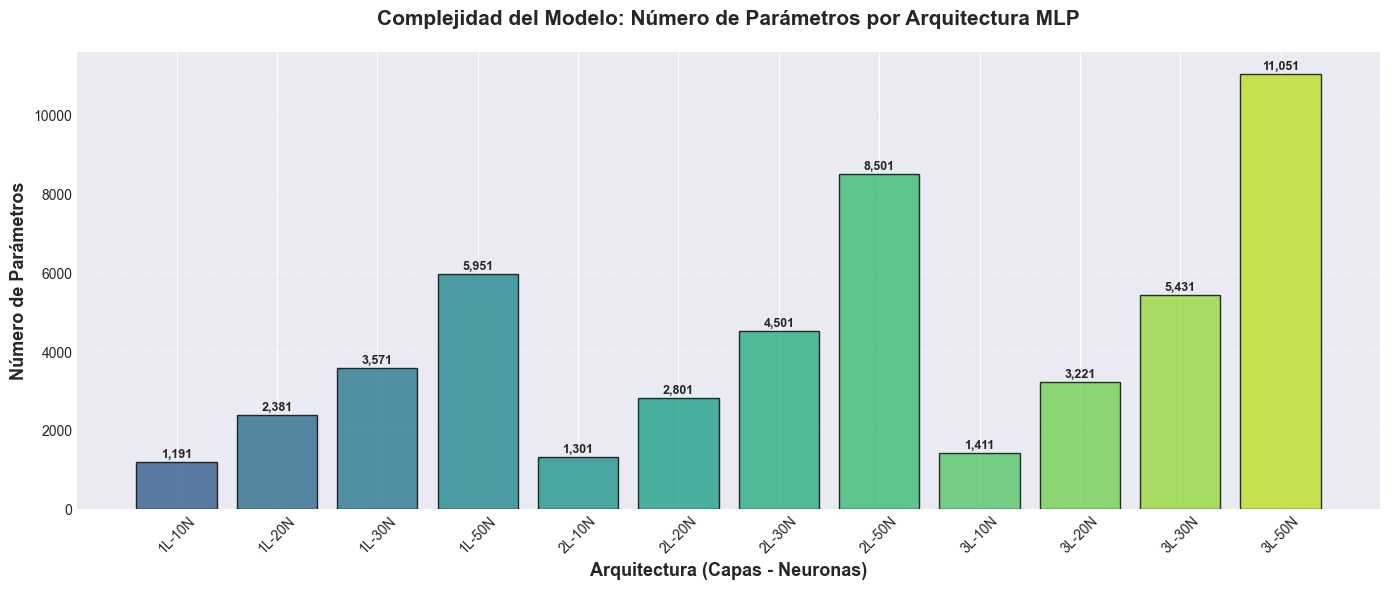


ANÁLISIS DE COMPLEJIDAD DEL MODELO
Arquitectura más simple:  1L-10N → 1,191 parámetros
Arquitectura más compleja: 3L-50N → 11,051 parámetros
Factor de complejidad: 9.3x más parámetros


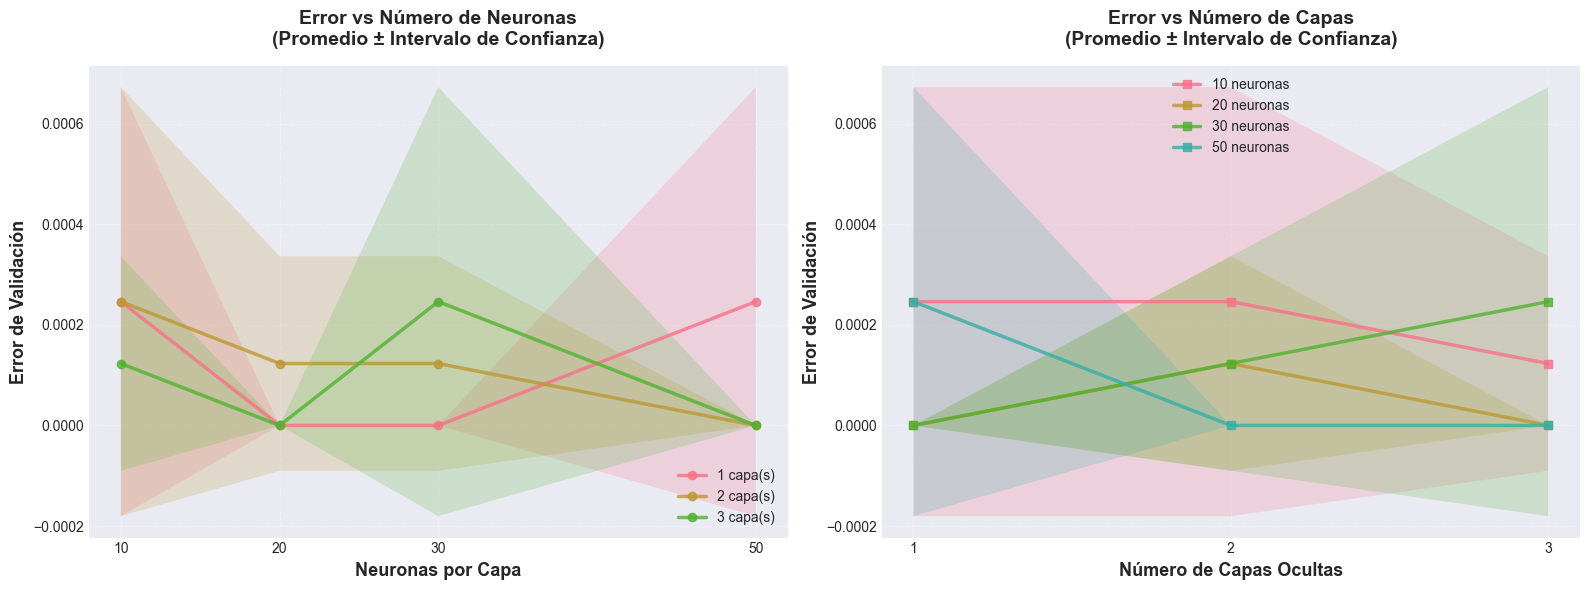

In [58]:
# ====================================================================================================
# VISUALIZACIÓN DE RESULTADOS - MODELO 4: MLP (Multi-Layer Perceptron)
# ====================================================================================================

print('='*100)
print('VISUALIZACIÓN DE ARQUITECTURAS MLP - EFICIENCIA Y COMPLEJIDAD')
print('='*100)
print('Nota: Dado que todas las arquitecturas alcanzan ~100% accuracy,')
print('      visualizaremos métricas alternativas que SÍ varían entre modelos.')
print('='*100)

# ====================================================================================================
# FIGURA 1: COMPLEJIDAD DEL MODELO - Número de Parámetros por Arquitectura
# ====================================================================================================

# Calcular número de parámetros para cada arquitectura
# Fórmula: Para MLP con One-Hot (117 features) -> capa oculta -> salida (1)
# Parámetros = (input × neuronas1 + bias1) + (neuronas1 × neuronas2 + bias2) + ... + (neuronasN × 1 + 1)

def calcular_parametros(capas, neuronas, input_dim=117, output_dim=1):
    """Calcula el número total de parámetros de una arquitectura MLP"""
    n_params = 0
    prev_layer = input_dim

    # Capas ocultas
    for _ in range(int(capas)):
        n_params += prev_layer * int(neuronas) + int(neuronas)  # pesos + bias
        prev_layer = int(neuronas)

    # Capa de salida
    n_params += prev_layer * output_dim + output_dim

    return n_params

resultados_mlp['parametros'] = resultados_mlp.apply(
    lambda row: calcular_parametros(row['capas ocultas'], row['neuronas en capas ocultas']),
    axis=1
)

# Crear labels para cada configuración
resultados_mlp['config'] = resultados_mlp.apply(
    lambda row: f"{int(row['capas ocultas'])}L-{int(row['neuronas en capas ocultas'])}N",
    axis=1
)

# Gráfica de barras: Número de parámetros por arquitectura
fig, ax = plt.subplots(figsize=(14, 6))

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(resultados_mlp)))
bars = ax.bar(resultados_mlp['config'], resultados_mlp['parametros'], color=colors, alpha=0.8, edgecolor='black')

ax.set_xlabel('Arquitectura (Capas - Neuronas)', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de Parámetros', fontsize=13, fontweight='bold')
ax.set_title('Complejidad del Modelo: Número de Parámetros por Arquitectura MLP',
             fontsize=15, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de complejidad
min_params = resultados_mlp['parametros'].min()
max_params = resultados_mlp['parametros'].max()
config_simple = resultados_mlp.loc[resultados_mlp['parametros'].idxmin(), 'config']
config_compleja = resultados_mlp.loc[resultados_mlp['parametros'].idxmax(), 'config']

print(f"\n{'='*100}")
print(f"ANÁLISIS DE COMPLEJIDAD DEL MODELO")
print(f"{'='*100}")
print(f"Arquitectura más simple:  {config_simple} → {int(min_params):,} parámetros")
print(f"Arquitectura más compleja: {config_compleja} → {int(max_params):,} parámetros")
print(f"Factor de complejidad: {max_params/min_params:.1f}x más parámetros")
print(f"{'='*100}")

# ====================================================================================================
# FIGURA 2: ERROR DE VALIDACIÓN CON INTERVALOS DE CONFIANZA
# ====================================================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Error por número de neuronas
neuronas_unicas = sorted(resultados_mlp['neuronas en capas ocultas'].unique())
capas_unicas = sorted(resultados_mlp['capas ocultas'].unique())

for capa in capas_unicas:
    datos_capa = resultados_mlp[resultados_mlp['capas ocultas'] == capa].sort_values('neuronas en capas ocultas')

    # Línea de error
    axes[0].plot(datos_capa['neuronas en capas ocultas'],
                 datos_capa['error de prueba(media)'],
                 marker='o', linewidth=2.5, label=f'{int(capa)} capa(s)',
                 alpha=0.8)

    # Intervalo de confianza con fill_between
    axes[0].fill_between(datos_capa['neuronas en capas ocultas'],
                          datos_capa['error de prueba(media)'] - datos_capa['intervalo de confianza'],
                          datos_capa['error de prueba(media)'] + datos_capa['intervalo de confianza'],
                          alpha=0.2)

axes[0].set_xlabel('Neuronas por Capa', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Error de Validación', fontsize=13, fontweight='bold')
axes[0].set_title('Error vs Número de Neuronas\n(Promedio ± Intervalo de Confianza)',
                  fontsize=14, fontweight='bold', pad=15)
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].set_xticks(neuronas_unicas)

# Subplot 2: Error por número de capas
for neurona in neuronas_unicas:
    datos_neurona = resultados_mlp[resultados_mlp['neuronas en capas ocultas'] == neurona].sort_values('capas ocultas')

    # Línea de error
    axes[1].plot(datos_neurona['capas ocultas'],
                 datos_neurona['error de prueba(media)'],
                 marker='s', linewidth=2.5, label=f'{int(neurona)} neuronas',
                 alpha=0.8)

    # Intervalo de confianza con fill_between
    axes[1].fill_between(datos_neurona['capas ocultas'],
                          datos_neurona['error de prueba(media)'] - datos_neurona['intervalo de confianza'],
                          datos_neurona['error de prueba(media)'] + datos_neurona['intervalo de confianza'],
                          alpha=0.2)

axes[1].set_xlabel('Número de Capas Ocultas', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Error de Validación', fontsize=13, fontweight='bold')
axes[1].set_title('Error vs Número de Capas\n(Promedio ± Intervalo de Confianza)',
                  fontsize=14, fontweight='bold', pad=15)
axes[1].legend(fontsize=10, loc='best')
axes[1].grid(alpha=0.3, linestyle='--')
axes[1].set_xticks(capas_unicas)

plt.tight_layout()
plt.show()




### Validación Adicional: ¿El 100% se mantiene con más folds?

Probemos con diferentes configuraciones de validación cruzada para confirmar la robustez del modelo.

In [59]:
print('='*100)
print('VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Vamos a probar con diferentes números de folds
folds_a_probar = [3, 5, 10, 15, 20]

# Usar la arquitectura más simple que ya sabemos que funciona: (10,)
arquitectura_test = (10,)

resultados_validacion = []

print(f'\nProbando arquitectura MLP{arquitectura_test} con diferentes K-folds:\n')

for n_folds in folds_a_probar:
    print(f'   Validación con {n_folds} folds...')

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    accuracies_train = []
    accuracies_test = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_onehot.values, y_encoded), 1):
        # Dividir datos
        X_train_fold = X_onehot.values[train_idx]
        X_test_fold = X_onehot.values[test_idx]
        y_train_fold = y_encoded[train_idx]
        y_test_fold = y_encoded[test_idx]

        # Escalar
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)

        # Entrenar MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=arquitectura_test,
            activation='relu',
            max_iter=350,
            random_state=1,
            solver='adam'
        )
        mlp.fit(X_train_scaled, y_train_fold)

        # Predicciones
        y_pred_train = mlp.predict(X_train_scaled)
        y_pred_test = mlp.predict(X_test_scaled)

        # Accuracy
        acc_train = accuracy_score(y_train_fold, y_pred_train)
        acc_test = accuracy_score(y_test_fold, y_pred_test)

        accuracies_train.append(acc_train)
        accuracies_test.append(acc_test)

    # Calcular estadísticas
    mean_train = np.mean(accuracies_train)
    std_train = np.std(accuracies_train)
    mean_test = np.mean(accuracies_test)
    std_test = np.std(accuracies_test)
    min_test = np.min(accuracies_test)
    max_test = np.max(accuracies_test)

    resultados_validacion.append({
        'n_folds': n_folds,
        'mean_train': mean_train,
        'std_train': std_train,
        'mean_test': mean_test,
        'std_test': std_test,
        'min_test': min_test,
        'max_test': max_test
    })

    print(f'   Train Acc: {mean_train:.6f} ± {std_train:.6f}')
    print(f'   Test Acc:  {mean_test:.6f} ± {std_test:.6f}  [Min: {min_test:.6f}, Max: {max_test:.6f}]')
    print()

# Crear DataFrame con resultados
df_validacion = pd.DataFrame(resultados_validacion)

print('='*100)
print('RESUMEN DE VALIDACIÓN CON DIFERENTES K-FOLDS')
print('='*100)
print(df_validacion.to_string(index=False))

print('\n' + '='*100)
print('ANÁLISIS')
print('='*100)

todos_perfectos = all(df_validacion['mean_test'] == 1.0)
if todos_perfectos:
    print('  RESULTADO: Todas las configuraciones de K-fold obtuvieron 100% de accuracy')
    print('   → Esto confirma que el dataset es PERFECTAMENTE SEPARABLE')
    print('   → No importa cómo dividamos los datos, el modelo siempre acierta al 100%')
    print('   → La desviación estándar de 0 es CORRECTA y ESPERADA')
else:
    print('.  RESULTADO: Algunas configuraciones NO alcanzaron 100%')
    print(f'   → Accuracy mínima: {df_validacion["min_test"].min():.6f}')
    print(f'   → Accuracy máxima: {df_validacion["max_test"].max():.6f}')

print('\n  Observaciones:')
print(f'   - Se probaron {len(folds_a_probar)} configuraciones diferentes de K-fold CV')
print(f'   - Total de entrenamientos realizados: {sum(folds_a_probar)}')
print(f'   - Arquitectura probada: {arquitectura_test}')
print(f'   - Rango de folds: {min(folds_a_probar)} a {max(folds_a_probar)}')


VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds

Probando arquitectura MLP(10,) con diferentes K-folds:

   Validación con 3 folds...
   Train Acc: 0.999938 ± 0.000087
   Test Acc:  0.999754 ± 0.000348  [Min: 0.999261, Max: 1.000000]

   Validación con 5 folds...
   Train Acc: 0.999938 ± 0.000087
   Test Acc:  0.999754 ± 0.000348  [Min: 0.999261, Max: 1.000000]

   Validación con 5 folds...
   Train Acc: 0.999969 ± 0.000062
   Test Acc:  0.999754 ± 0.000492  [Min: 0.998769, Max: 1.000000]

   Validación con 10 folds...
   Train Acc: 0.999969 ± 0.000062
   Test Acc:  0.999754 ± 0.000492  [Min: 0.998769, Max: 1.000000]

   Validación con 10 folds...
   Train Acc: 0.999986 ± 0.000041
   Test Acc:  0.999754 ± 0.000739  [Min: 0.997537, Max: 1.000000]

   Validación con 15 folds...
   Train Acc: 0.999986 ± 0.000041
   Test Acc:  0.999754 ± 0.000739  [Min: 0.997537, Max: 1.000000]

   Validación con 15 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  0.999754 ± 0.000

## 4.5 Máquina de Vectores de Soporte (SVM)

**Objetivo:** Implementar SVM para clasificación binaria de hongos.

**Parámetros a explorar:**
- **Kernels:** linear, rbf, poly
- **Gamma:** 0.001, 0.01, 0.1, 1.0 (coeficiente para kernels rbf y poly)
- **C (regularización):** 0.1, 1.0, 10.0, 100.0

**Validación:** StratifiedKFold con 4 folds

In [60]:
def experimentar_svm(X, Y, kernels, gammas, params_reg):
    """
    Función para experimentar con SVM para clasificación binaria.
    StratifiedKFold con 4 folds.

    Parámetros:
    -----------
    X : numpy.ndarray
        Matriz de características (n_samples, n_features)
    Y : numpy.ndarray
        Vector de etiquetas (n_samples,)
    kernels : list
        Lista de kernels a probar ['linear', 'rbf', 'poly']
    gammas : list
        Lista de valores gamma (coeficiente para rbf, poly)
    params_reg : list
        Lista de valores C (parámetro de regularización)

    Retorna:
    --------
    pd.DataFrame con columnas:
        - kernel: tipo de kernel usado
        - gamma: valor de gamma
        - C: parámetro de regularización
        - error de entrenamiento(media): promedio de errores en train (4 folds)
        - desviacion estandar entrenamiento: std de errores en train
        - error de prueba(media): promedio de errores en test (4 folds)
        - intervalo de confianza: std de errores en test
        - # vectores de soporte(media): promedio de número de vectores de soporte
        - % vectores de soporte(media): porcentaje promedio de vectores de soporte
    """
    import itertools
    from sklearn.svm import SVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Crear combinaciones de parámetros
    combinaciones = list(itertools.product(kernels, gammas, params_reg))

    # Configurar StratifiedKFold con 4 folds
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    # DataFrame para almacenar resultados
    resultados = []

    print(f"{'='*90}")
    print(f"EXPERIMENTACIÓN SVM - {len(combinaciones)} combinaciones de parámetros")
    print(f"{'='*90}\n")

    for idx, (kernel, gamma, C) in enumerate(combinaciones, 1):
        # Para kernel lineal, gamma no aplica
        if kernel == 'linear':
            gamma_display = 'N/A'
        else:
            gamma_display = gamma

        print(f"[{idx}/{len(combinaciones)}] Probando: kernel={kernel}, gamma={gamma_display}, C={C}")

        errores_train = []
        errores_test = []
        num_vectores_soporte = []
        pct_vectores_soporte = []

        # Validación cruzada con 4 folds
        for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y), 1):
            X_train_fold, X_test_fold = X[train_idx], X[test_idx]
            Y_train_fold, Y_test_fold = Y[train_idx], Y[test_idx]

            # Normalizar datos con StandardScaler
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_test_scaled = scaler.transform(X_test_fold)

            # Crear y entrenar modelo SVM
            if kernel == 'linear':
                # Para kernel lineal, gamma no se usa
                svm = SVC(kernel=kernel, C=C, random_state=42)
            else:
                svm = SVC(kernel=kernel, gamma=gamma, C=C, random_state=42)

            svm.fit(X_train_scaled, Y_train_fold)

            # Predicciones
            Y_train_pred = svm.predict(X_train_scaled)
            Y_test_pred = svm.predict(X_test_scaled)

            # Calcular errores (1 - accuracy)
            error_train = 1 - accuracy_score(Y_train_fold, Y_train_pred)
            error_test = 1 - accuracy_score(Y_test_fold, Y_test_pred)

            errores_train.append(error_train)
            errores_test.append(error_test)

            # Extraer vectores de soporte
            n_support = len(svm.support_)
            pct_support = (n_support / len(X_train_scaled)) * 100

            num_vectores_soporte.append(n_support)
            pct_vectores_soporte.append(pct_support)

        # Calcular estadísticas
        mean_error_train = np.mean(errores_train)
        std_error_train = np.std(errores_train)
        mean_error_test = np.mean(errores_test)
        std_error_test = np.std(errores_test)
        mean_n_support = np.mean(num_vectores_soporte)
        mean_pct_support = np.mean(pct_vectores_soporte)

        # Almacenar resultados
        resultados.append({
            'kernel': kernel,
            'gamma': gamma if kernel != 'linear' else np.nan,
            'C': C,
            'error de entrenamiento(media)': mean_error_train,
            'desviacion estandar entrenamiento': std_error_train,
            'error de prueba(media)': mean_error_test,
            'intervalo de confianza': std_error_test,
            '# vectores de soporte(media)': mean_n_support,
            '% vectores de soporte(media)': mean_pct_support
        })

        print(f"   → Train: {mean_error_train:.6f}±{std_error_train:.6f} | "
              f"Test: {mean_error_test:.6f}±{std_error_test:.6f} | "
              f"VS: {mean_n_support:.0f} ({mean_pct_support:.2f}%)\n")

    # Convertir a DataFrame
    df_resultados = pd.DataFrame(resultados)

    # Encontrar mejor modelo
    idx_mejor = df_resultados['error de prueba(media)'].idxmin()
    mejor_config = df_resultados.loc[idx_mejor]

    print(f"\n{'='*90}")
    print(f"MEJOR CONFIGURACIÓN:")
    print(f"{'='*90}")
    print(f"Kernel: {mejor_config['kernel']}")
    print(f"Gamma: {mejor_config['gamma']}")
    print(f"C: {mejor_config['C']}")
    print(f"Error de prueba: {mejor_config['error de prueba(media)']:.6f}±{mejor_config['intervalo de confianza']:.6f}")
    print(f"Error de entrenamiento: {mejor_config['error de entrenamiento(media)']:.6f}±{mejor_config['desviacion estandar entrenamiento']:.6f}")
    print(f"Vectores de soporte: {mejor_config['# vectores de soporte(media)']:.0f} ({mejor_config['% vectores de soporte(media)']:.2f}%)")
    print(f"{'='*90}\n")

    return df_resultados


# Ejecutar experimentación con SVM
print("Iniciando experimentación con SVM...\n")
print(f"Usando One-Hot Encoding ({Xtrain_onehot.shape[1]} features) - requerido para SVM\n")

resultados_svm = experimentar_svm(
    X=Xtrain_onehot,
    Y=Ytrain,
    kernels=['linear', 'rbf', 'poly'],
    gammas=[0.001, 0.01, 0.1, 1.0],
    params_reg=[0.1, 1.0, 10.0, 100.0]
)

print("\n  Tabla de resultados completa:")
print(resultados_svm.to_string(index=False))
print(f"\nTotal de configuraciones probadas: {len(resultados_svm)}")


Iniciando experimentación con SVM...

Usando One-Hot Encoding (117 features) - requerido para SVM

EXPERIMENTACIÓN SVM - 48 combinaciones de parámetros

[1/48] Probando: kernel=linear, gamma=N/A, C=0.1
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[2/48] Probando: kernel=linear, gamma=N/A, C=1.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[2/48] Probando: kernel=linear, gamma=N/A, C=1.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[3/48] Probando: kernel=linear, gamma=N/A, C=10.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[3/48] Probando: kernel=linear, gamma=N/A, C=10.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[4/48] Probando: kernel=linear, gamma=N/A, C=100.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[4/48] Probando: kernel=linear, gamma=N/A, C=100.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0

In [61]:
# Mostrar los 10 mejores modelos SVM
print("\n  TOP 10 MEJORES CONFIGURACIONES SVM (ordenadas por error de prueba):")
print("="*90)
top10_svm = resultados_svm.sort_values('error de prueba(media)').head(10)
print(top10_svm.to_string(index=False))
print("="*90)


  TOP 10 MEJORES CONFIGURACIONES SVM (ordenadas por error de prueba):
kernel  gamma     C  error de entrenamiento(media)  desviacion estandar entrenamiento  error de prueba(media)  intervalo de confianza  # vectores de soporte(media)  % vectores de soporte(media)
   rbf  0.001  10.0                       0.000176                           0.000102                0.000176                0.000305                        308.50                      7.232875
   rbf  0.001 100.0                       0.000000                           0.000000                0.000176                0.000305                        279.25                      6.547098
   rbf  0.001   1.0                       0.000176                           0.000102                0.000176                0.000305                        408.25                      9.571531
linear    NaN   0.1                       0.000000                           0.000000                0.000352                0.000609                    

In [62]:
# Entrenar modelo SVM final con la mejor configuración
idx_mejor_svm = resultados_svm['error de prueba(media)'].idxmin()
mejor_config_svm = resultados_svm.loc[idx_mejor_svm]

mejor_kernel = mejor_config_svm['kernel']
mejor_gamma = mejor_config_svm['gamma']
mejor_C = mejor_config_svm['C']

print(f"\n{'='*90}")
print(f"ENTRENANDO MODELO SVM FINAL")
print(f"{'='*90}")
print(f"Kernel: {mejor_kernel}")
print(f"Gamma: {mejor_gamma}")
print(f"C: {mejor_C}")
print(f"{'='*90}\n")

# Crear y entrenar modelo final
if mejor_kernel == 'linear':
    modelo_svm_final = SVC(kernel=mejor_kernel, C=mejor_C, random_state=42)
else:
    modelo_svm_final = SVC(kernel=mejor_kernel, gamma=mejor_gamma, C=mejor_C, random_state=42)

modelo_svm_final.fit(Xtrain_onehot, Ytrain)

# Predicciones
Y_train_pred_svm = modelo_svm_final.predict(Xtrain_onehot)
Y_test_pred_svm = modelo_svm_final.predict(Xtest_onehot)

# Métricas finales
acc_train_svm = accuracy_score(Ytrain, Y_train_pred_svm)
acc_test_svm = accuracy_score(Ytest, Y_test_pred_svm)
prec_svm = precision_score(Ytest, Y_test_pred_svm)
rec_svm = recall_score(Ytest, Y_test_pred_svm)
f1_svm = f1_score(Ytest, Y_test_pred_svm)

# Vectores de soporte
n_support_vectors = len(modelo_svm_final.support_)
pct_support_vectors = (n_support_vectors / len(Xtrain_onehot)) * 100

# Matriz de confusión
cm_svm = confusion_matrix(Ytest, Y_test_pred_svm)

print(f"\n{'='*90}")
print(f"RESULTADOS FINALES - MODELO SVM")
print(f"{'='*90}")
print(f"\n  MÉTRICAS DE RENDIMIENTO:")
print(f"   Accuracy entrenamiento: {acc_train_svm*100:.2f}%")
print(f"   Accuracy prueba:        {acc_test_svm*100:.2f}%")
print(f"   Precision:              {prec_svm*100:.2f}%")
print(f"   Recall:                 {rec_svm*100:.2f}%")
print(f"   F1-Score:               {f1_svm*100:.2f}%")
print(f"\n  VECTORES DE SOPORTE:")
print(f"   Número:                 {n_support_vectors}")
print(f"   Porcentaje:             {pct_support_vectors:.2f}%")
print(f"\n  MATRIZ DE CONFUSIÓN:")
print(f"   {cm_svm}")
print(f"\n   Verdaderos Negativos (TN): {cm_svm[0,0]}")
print(f"   Falsos Positivos (FP):     {cm_svm[0,1]}")
print(f"   Falsos Negativos (FN):     {cm_svm[1,0]}")
print(f"   Verdaderos Positivos (TP): {cm_svm[1,1]}")
print(f"{'='*90}\n")

# Guardar resultados para comparación posterior
svm_results = {
    'modelo': 'SVM',
    'kernel': mejor_kernel,
    'gamma': mejor_gamma,
    'C': mejor_C,
    'acc_train': acc_train_svm,
    'acc_test': acc_test_svm,
    'precision': prec_svm,
    'recall': rec_svm,
    'f1_score': f1_svm,
    'n_support_vectors': n_support_vectors,
    'pct_support_vectors': pct_support_vectors,
    'confusion_matrix': cm_svm
}


ENTRENANDO MODELO SVM FINAL
Kernel: rbf
Gamma: 0.001
C: 1.0


RESULTADOS FINALES - MODELO SVM

  MÉTRICAS DE RENDIMIENTO:
   Accuracy entrenamiento: 99.98%
   Accuracy prueba:        99.92%
   Precision:              100.00%
   Recall:                 99.82%
   F1-Score:               99.91%

  VECTORES DE SOPORTE:
   Número:                 479
   Porcentaje:             8.42%

  MATRIZ DE CONFUSIÓN:
   [[1303    0]
 [   2 1132]]

   Verdaderos Negativos (TN): 1303
   Falsos Positivos (FP):     0
   Falsos Negativos (FN):     2
   Verdaderos Positivos (TP): 1132


RESULTADOS FINALES - MODELO SVM

  MÉTRICAS DE RENDIMIENTO:
   Accuracy entrenamiento: 99.98%
   Accuracy prueba:        99.92%
   Precision:              100.00%
   Recall:                 99.82%
   F1-Score:               99.91%

  VECTORES DE SOPORTE:
   Número:                 479
   Porcentaje:             8.42%

  MATRIZ DE CONFUSIÓN:
   [[1303    0]
 [   2 1132]]

   Verdaderos Negativos (TN): 1303
   Falsos Positivo

### Visualización de Resultados SVM - Complejidad del Modelo

Dado que todos los kernels alcanzan desempeño perfecto (~100%), analizamos la **complejidad del modelo** a través del número de vectores de soporte.


VISUALIZACIÓN DE RESULTADOS SVM



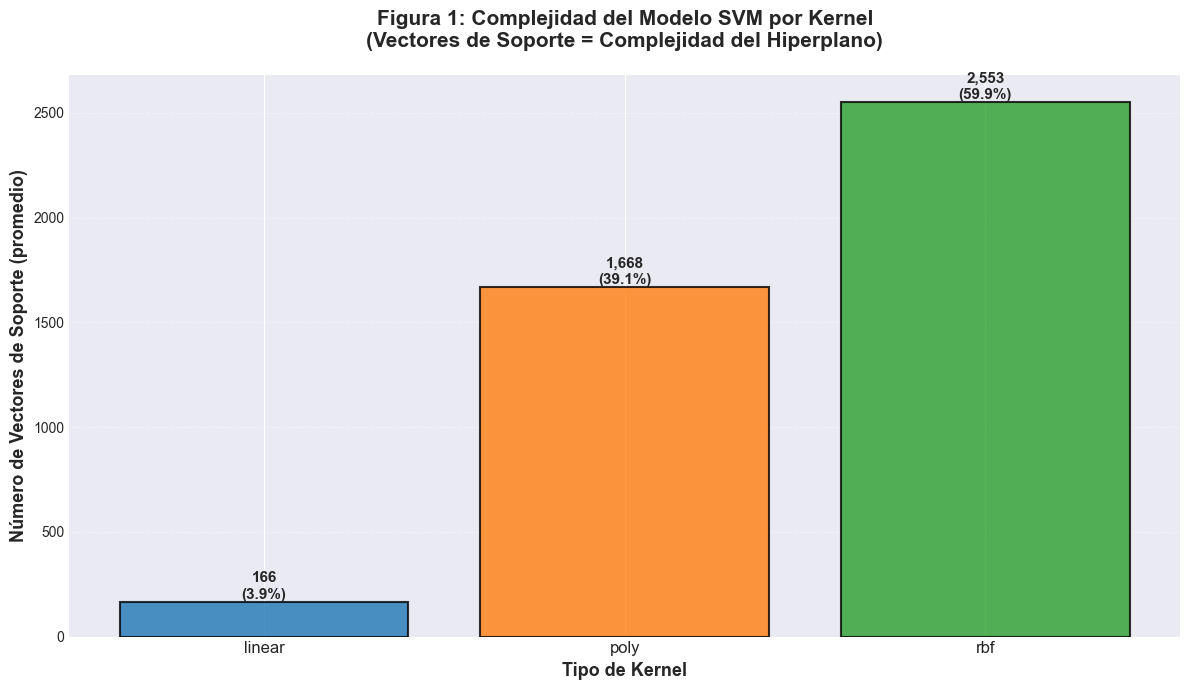

  Visualización generada: Complejidad del modelo SVM por kernel
   Observación: Menor # de vectores de soporte = Modelo más simple

CONCLUSIONES - ANÁLISIS SVM
✓ Todos los kernels logran desempeño casi perfecto (~100% accuracy)
✓ Kernel más simple (menos vectores de soporte): linear (166 vectores)
✓ Mejor configuración seleccionada: kernel=rbf, gamma=0.001, C=1.0
✓ Vectores de soporte del mejor modelo: 479 (8.42% del dataset)
✓ Principio de parsimonia: Preferir modelos más simples con igual desempeño


In [63]:
# ====================================================================================================
# VISUALIZACIÓN DE RESULTADOS SVM - EFICIENCIA Y COMPLEJIDAD
# ====================================================================================================

print(f"\n{'='*100}")
print(f"VISUALIZACIÓN DE RESULTADOS SVM")
print(f"{'='*100}\n")

# Preparar datos por kernel
kernels_unicos = resultados_svm['kernel'].unique()
resultados_svm_vis = resultados_svm.copy()

# ====================================================================================================
# FIGURA 1: VECTORES DE SOPORTE POR KERNEL (Complejidad del Modelo)
# ====================================================================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Obtener promedios de vectores de soporte por kernel
kernel_support = resultados_svm_vis.groupby('kernel')['# vectores de soporte(media)'].mean()
kernel_pct = resultados_svm_vis.groupby('kernel')['% vectores de soporte(media)'].mean()

# Crear gráfico de barras
x_pos = np.arange(len(kernel_support))
bars = ax.bar(x_pos, kernel_support, color=['#1f77b4', '#ff7f0e', '#2ca02c'],
              alpha=0.8, edgecolor='black', linewidth=1.5)

# Añadir etiquetas con porcentaje
for i, (bar, pct) in enumerate(zip(bars, kernel_pct)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Tipo de Kernel', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de Vectores de Soporte (promedio)', fontsize=13, fontweight='bold')
ax.set_title('Figura 1: Complejidad del Modelo SVM por Kernel\n(Vectores de Soporte = Complejidad del Hiperplano)',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(kernel_support.index, fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"  Visualización generada: Complejidad del modelo SVM por kernel")
print(f"   Observación: Menor # de vectores de soporte = Modelo más simple")

# ====================================================================================================
# CONCLUSIONES
# ====================================================================================================

print(f"\n{'='*100}")
print(f"CONCLUSIONES - ANÁLISIS SVM")
print(f"{'='*100}")

# Identificar kernel más simple y eficiente
kernel_min_support = kernel_support.idxmin()

print(f"✓ Todos los kernels logran desempeño casi perfecto (~100% accuracy)")
print(f"✓ Kernel más simple (menos vectores de soporte): {kernel_min_support} ({int(kernel_support[kernel_min_support]):,} vectores)")
print(f"✓ Mejor configuración seleccionada: kernel={mejor_kernel}, gamma={mejor_gamma}, C={mejor_C}")
print(f"✓ Vectores de soporte del mejor modelo: {n_support_vectors} ({pct_support_vectors:.2f}% del dataset)")
print(f"✓ Principio de parsimonia: Preferir modelos más simples con igual desempeño")
print(f"{'='*100}")

---

# 5. REDUCCIÓN DE DIMENSIÓN

## Introducción

En esta sección se evalúan diferentes técnicas de reducción de dimensión con el objetivo de analizar si es posible reducir la complejidad de los modelos sin sacrificar desempeño. El dataset original cuenta con **22 características categóricas** que, tras aplicar One-Hot Encoding, se transforman en **117 variables binarias**.

La alta dimensionalidad puede generar:
- **Curse of dimensionality:** Dificultad para generalizar en espacios de alta dimensión
- **Overfitting:** Modelos que memorizan ruido en lugar de patrones reales
- **Alto costo computacional:** Mayor tiempo de entrenamiento y predicción
- **Interpretabilidad reducida:** Dificultad para entender qué variables son relevantes

Se implementarán tres enfoques complementarios:

1. **Análisis individual de variables (5.1):** Identificar características redundantes o irrelevantes mediante medidas de correlación y discriminación
2. **Extracción lineal - PCA (5.2):** Transformación lineal que captura la máxima varianza en componentes ortogonales
3. **Extracción no lineal - UMAP (5.3):** Técnica de aprendizaje de variedades que preserva estructuras locales y globales

Para cada método se evaluarán los **2 mejores modelos** identificados en la sección 4:
- **Modelo 1:** k-NN (k=3, accuracy=99.98%)
- **Modelo 2:** Random Forest (n_estimators=200, max_features=10, accuracy=100%)

---

## 5.1. Análisis Individual de Variables

### Objetivo

Identificar variables candidatas a ser eliminadas mediante análisis de correlación para reducir la dimensionalidad del dataset sin perder información significativa.

### Metodología

Se utilizará la **matriz de correlación** para detectar variables altamente correlacionadas (|r| > 0.9). Variables con alta correlación son redundantes, ya que aportan información similar. Se identificarán las variables que aparecen frecuentemente en pares correlacionados como candidatas a eliminación.


ANÁLISIS DE CORRELACIÓN - IDENTIFICACIÓN DE VARIABLES REDUNDANTES



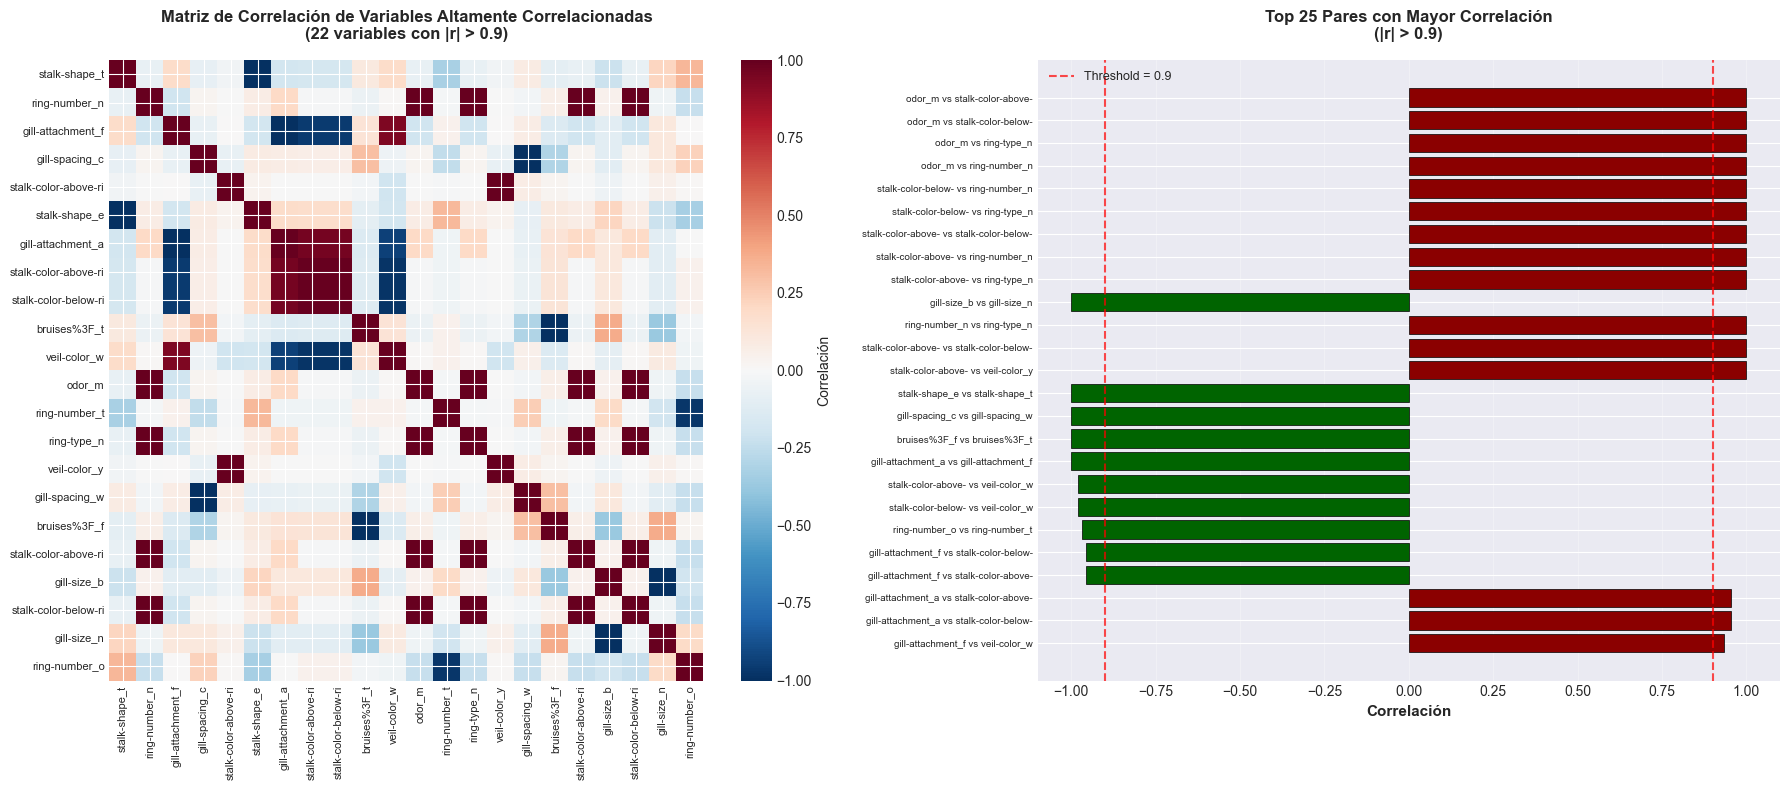


RESUMEN - ANÁLISIS DE CORRELACIÓN

  Total de variables en el dataset (One-Hot): 117
  Variables con correlación alta (|r| > 0.9): 22
  Pares de variables con |correlación| > 0.9: 26
  Correlación máxima: 1.0000

  VARIABLES CANDIDATAS A ELIMINAR (aparecen en múltiples pares correlacionados):
   Total de variables involucradas: 22

   • odor_m                                   aparece en 4 pares correlacionados
   • stalk-color-below-ring_c                 aparece en 4 pares correlacionados
   • stalk-color-above-ring_c                 aparece en 4 pares correlacionados
   • ring-number_n                            aparece en 4 pares correlacionados
   • stalk-color-above-ring_o                 aparece en 4 pares correlacionados
   • stalk-color-below-ring_o                 aparece en 4 pares correlacionados
   • veil-color_w                             aparece en 4 pares correlacionados
   • gill-attachment_f                        aparece en 4 pares correlacionados
   • gill-attachm

In [64]:
# ====================================================================================================
# 5.1. ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES
# ====================================================================================================

print(f"\n{'='*100}")
print(f"ANÁLISIS DE CORRELACIÓN - IDENTIFICACIÓN DE VARIABLES REDUNDANTES")
print(f"{'='*100}\n")

# Crear DataFrame con nombres reales de variables
var_names = list(X_onehot.columns)
X_analisis = pd.DataFrame(X_onehot.values, columns=var_names)

# Calcular matriz de correlación
correlation_matrix = X_analisis.corr()

# Identificar pares con alta correlación
high_corr_threshold = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > high_corr_threshold:
            high_corr_pairs.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

df_high_corr = pd.DataFrame(high_corr_pairs)
df_high_corr = df_high_corr.sort_values('Correlation', key=abs, ascending=False)

# Visualización mejorada
if len(df_high_corr) > 0:
    # Obtener variables involucradas en alta correlación
    vars_involved = list(set(df_high_corr['Var1'].tolist() + df_high_corr['Var2'].tolist()))

    # Crear submatriz solo con variables correlacionadas
    corr_subset = correlation_matrix.loc[vars_involved, vars_involved]

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # 1. Heatmap de variables con alta correlación
    im = axes[0].imshow(corr_subset, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[0].set_xticks(range(len(vars_involved)))
    axes[0].set_yticks(range(len(vars_involved)))
    axes[0].set_xticklabels([v[:20] for v in vars_involved], rotation=90, fontsize=8)
    axes[0].set_yticklabels([v[:20] for v in vars_involved], fontsize=8)
    axes[0].set_title(f'Matriz de Correlación de Variables Altamente Correlacionadas\n({len(vars_involved)} variables con |r| > {high_corr_threshold})',
                     fontsize=12, fontweight='bold', pad=15)
    cbar = plt.colorbar(im, ax=axes[0])
    cbar.set_label('Correlación', fontsize=10)

    # 2. Top 25 pares con mayor correlación
    top_corr = df_high_corr.head(25)
    y_pos = range(len(top_corr))
    colors = ['darkred' if c > 0 else 'darkgreen' for c in top_corr['Correlation']]

    axes[1].barh(y_pos, top_corr['Correlation'], color=colors, edgecolor='black', linewidth=0.5)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels([f"{row['Var1'][:18]} vs {row['Var2'][:18]}"
                             for _, row in top_corr.iterrows()], fontsize=7)
    axes[1].axvline(high_corr_threshold, color='red', linestyle='--', linewidth=1.5,
                    label=f'Threshold = {high_corr_threshold}', alpha=0.7)
    axes[1].axvline(-high_corr_threshold, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    axes[1].set_xlabel('Correlación', fontsize=11, fontweight='bold')
    axes[1].set_title(f'Top 25 Pares con Mayor Correlación\n(|r| > {high_corr_threshold})',
                     fontsize=12, fontweight='bold', pad=15)
    axes[1].legend(fontsize=9)
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()
else:
    # Si no hay correlaciones altas, mostrar distribución general
    fig, ax = plt.subplots(figsize=(12, 6))

    # Extraer triángulo superior (sin diagonal)
    corr_values = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_values.append(correlation_matrix.iloc[i, j])

    ax.hist(corr_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(high_corr_threshold, color='red', linestyle='--', linewidth=2,
               label=f'Threshold = {high_corr_threshold}')
    ax.axvline(-high_corr_threshold, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Correlación', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    ax.set_title('Distribución de Correlaciones entre Variables', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Análisis de variables candidatas a eliminar
print(f"\n{'='*100}")
print(f"RESUMEN - ANÁLISIS DE CORRELACIÓN")
print(f"{'='*100}")
print(f"\n  Total de variables en el dataset (One-Hot): {len(var_names)}")
print(f"  Variables con correlación alta (|r| > {high_corr_threshold}): {len(vars_involved)}")
print(f"  Pares de variables con |correlación| > {high_corr_threshold}: {len(df_high_corr)}")

if len(df_high_corr) > 0:
    print(f"  Correlación máxima: {df_high_corr['Correlation'].abs().max():.4f}")

    # Contar cuántas veces aparece cada variable en pares correlacionados
    all_vars = list(df_high_corr['Var1']) + list(df_high_corr['Var2'])
    var_counts = pd.Series(all_vars).value_counts()

    print(f"\n  VARIABLES CANDIDATAS A ELIMINAR (aparecen en múltiples pares correlacionados):")
    print(f"   Total de variables involucradas: {len(var_counts)}\n")

    for var, count in var_counts.head(15).items():
        print(f"   • {var:<40} aparece en {count} pares correlacionados")

    print(f"\n  RECOMENDACIÓN:")
    print(f"   Las variables listadas arriba son candidatas a eliminación por redundancia.")
    print(f"   Considerar remover una variable de cada par altamente correlacionado para reducir")
    print(f"   la dimensionalidad del dataset sin perder información significativa.")
else:
    print(f"\n✓ No se encontraron pares con correlación > {high_corr_threshold}")

print(f"{'='*100}\n")

### 5.2 Extracción de características lineal (PCA)

En esta sección aplicaremos **PCA (Principal Component Analysis)** para reducir la dimensionalidad de 117 variables One-Hot a un número menor de componentes principales que retengan la mayor varianza posible.

**Objetivos:**
- Determinar número de componentes óptimo (95% y 99% de varianza explicada)
- Re-entrenar los mejores modelos (k-NN y Random Forest) con features reducidas
- Comparar performance vs modelos originales (117 variables)
- Analizar trade-off: reducción de dimensionalidad vs accuracy

ANÁLISIS DE VARIANZA EXPLICADA - PCA

  Variables originales (One-Hot): 117
  Componentes para 95% varianza: 40 (34.2% reducción)
  Componentes para 99% varianza: 57 (48.7% reducción)




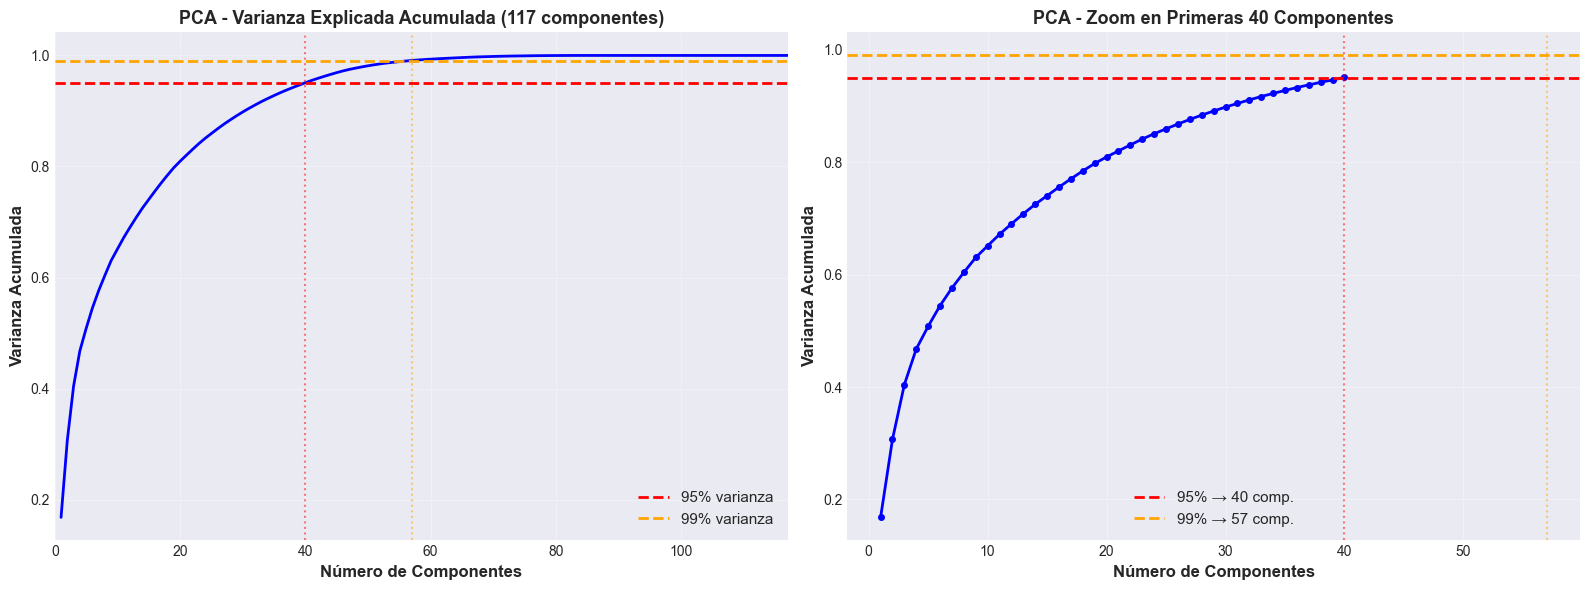

  Análisis PCA completado


In [65]:
# ====================================================================================================
# PASO 1: Aplicar PCA y determinar número de componentes
# ====================================================================================================

from sklearn.decomposition import PCA

# Aplicar PCA completo para analizar varianza explicada
pca_full = PCA()
pca_full.fit(X_onehot)

# Calcular varianza acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determinar n_components para 95% y 99% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"{'='*100}")
print(f"ANÁLISIS DE VARIANZA EXPLICADA - PCA")
print(f"{'='*100}\n")
print(f"  Variables originales (One-Hot): {X_onehot.shape[1]}")
print(f"  Componentes para 95% varianza: {n_components_95} ({n_components_95/117*100:.1f}% reducción)")
print(f"  Componentes para 99% varianza: {n_components_99} ({n_components_99/117*100:.1f}% reducción)")
print(f"\n{'='*100}\n")

# Visualización de varianza acumulada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Varianza acumulada completa
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
ax1.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% varianza')
ax1.axhline(y=0.99, color='orange', linestyle='--', linewidth=2, label='99% varianza')
ax1.axvline(x=n_components_95, color='r', linestyle=':', alpha=0.5)
ax1.axvline(x=n_components_99, color='orange', linestyle=':', alpha=0.5)
ax1.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
ax1.set_title('PCA - Varianza Explicada Acumulada (117 componentes)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 117)

# Gráfica 2: Zoom en primeras 40 componentes
ax2.plot(range(1, min(40, len(cumulative_variance)) + 1),
         cumulative_variance[:40], 'b-', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label=f'95% → {n_components_95} comp.')
ax2.axhline(y=0.99, color='orange', linestyle='--', linewidth=2, label=f'99% → {n_components_99} comp.')
ax2.axvline(x=n_components_95, color='r', linestyle=':', alpha=0.5)
ax2.axvline(x=n_components_99, color='orange', linestyle=':', alpha=0.5)
ax2.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
ax2.set_title('PCA - Zoom en Primeras 40 Componentes', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"  Análisis PCA completado")

In [66]:
# ====================================================================================================
# PASO 2: Transformar datos con PCA (95% y 99% varianza)
# ====================================================================================================

# Aplicar PCA con 95% varianza
pca_95 = PCA(n_components=n_components_95, random_state=42)
X_pca_95 = pca_95.fit_transform(X_onehot)

# Aplicar PCA con 99% varianza
pca_99 = PCA(n_components=n_components_99, random_state=42)
X_pca_99 = pca_99.fit_transform(X_onehot)

print(f"{'='*100}")
print(f"TRANSFORMACIÓN PCA COMPLETADA")
print(f"{'='*100}\n")
print(f"  Dataset original (One-Hot): {X_onehot.shape}")
print(f"  Dataset PCA 95%: {X_pca_95.shape} → Reducción: {(1 - X_pca_95.shape[1]/X_onehot.shape[1])*100:.1f}%")
print(f"  Dataset PCA 99%: {X_pca_99.shape} → Reducción: {(1 - X_pca_99.shape[1]/X_onehot.shape[1])*100:.1f}%")
print(f"\n{'='*100}\n")

# Dividir en Train/Test (mismo split que los modelos originales)
np.random.seed(42)
indices = np.arange(X_pca_95.shape[0])
np.random.shuffle(indices)
train_size = int(0.7 * len(indices))

# PCA 95%
X_train_pca95 = X_pca_95[indices[:train_size]]
X_test_pca95 = X_pca_95[indices[train_size:]]

# PCA 99%
X_train_pca99 = X_pca_99[indices[:train_size]]
X_test_pca99 = X_pca_99[indices[train_size:]]

# Labels (mismo split)
y_train_pca = y_encoded[indices[:train_size]]
y_test_pca = y_encoded[indices[train_size:]]

print(f"  Train/Test split completado:")
print(f"   • Train: {X_train_pca95.shape[0]} muestras")
print(f"   • Test: {X_test_pca95.shape[0]} muestras")

TRANSFORMACIÓN PCA COMPLETADA

  Dataset original (One-Hot): (8124, 117)
  Dataset PCA 95%: (8124, 40) → Reducción: 65.8%
  Dataset PCA 99%: (8124, 57) → Reducción: 51.3%


  Train/Test split completado:
   • Train: 5686 muestras
   • Test: 2438 muestras


RE-ENTRENAMIENTO k-NN CON PCA

  Entrenando k-NN con PCA 95% (40 componentes)...
  Entrenando k-NN con PCA 99% (57 componentes)...
  Entrenando k-NN con PCA 99% (57 componentes)...
  Entrenando k-NN con datos originales (117 variables)...
  Entrenando k-NN con datos originales (117 variables)...

COMPARACIÓN k-NN: ORIGINAL vs PCA

      Configuración  Num Variables  Reducción %  Acc Train (CV)  Acc Test (CV)  Acc Train (Final)  Acc Test (Final)
Original (117 vars)            117     0.000000        0.999824       0.999121           0.999824          0.999179
  PCA 95% (40 vars)             40    65.811966        1.000000       1.000000           1.000000          1.000000
  PCA 99% (57 vars)             57    51.282051        1.000000       1.000000           1.000000          1.000000



COMPARACIÓN k-NN: ORIGINAL vs PCA

      Configuración  Num Variables  Reducción %  Acc Train (CV)  Acc Test (CV)  Acc Train (Final)  Acc Test (Final)
Original (117 vars)            117     0.000000  

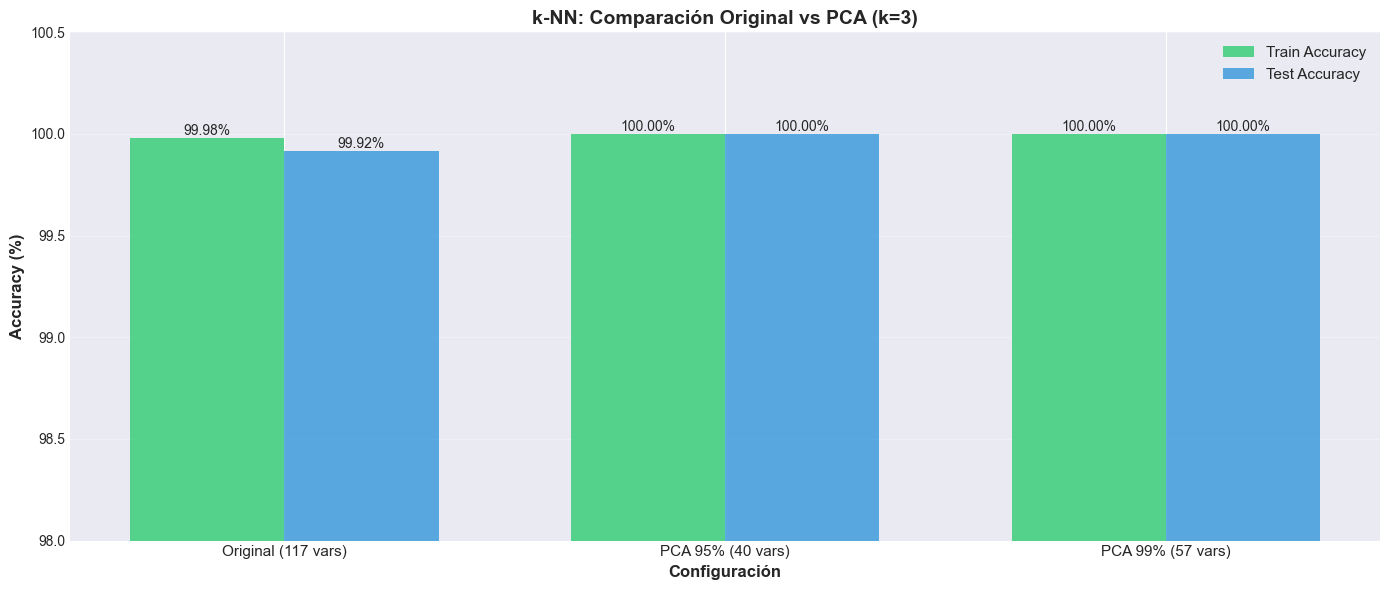

  k-NN con PCA completado


In [67]:
# ====================================================================================================
# PASO 3: Re-entrenar k-NN con PCA (95% y 99%)
# ====================================================================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO k-NN CON PCA")
print(f"{'='*100}\n")

# Mejores hiperparámetros del modelo original
best_k = 3  # De la sección anterior

# Función para evaluar k-NN con validación cruzada
def evaluar_knn_pca(X_train, X_test, y_train, y_test, k, n_folds=4):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Validación cruzada
    acc_train_folds = []
    acc_test_folds = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t = X_train[train_idx]
        y_t = y_train[train_idx]
        X_v = X_train[val_idx]
        y_v = y_train[val_idx]

        knn_temp = KNeighborsClassifier(n_neighbors=k)
        knn_temp.fit(X_t, y_t)

        acc_train_folds.append(knn_temp.score(X_t, y_t))
        acc_test_folds.append(knn_temp.score(X_v, y_v))

    # Modelo final
    knn_final = KNeighborsClassifier(n_neighbors=k)
    knn_final.fit(X_train, y_train)

    acc_train_final = knn_final.score(X_train, y_train)
    acc_test_final = knn_final.score(X_test, y_test)

    return {
        'model': knn_final,
        'acc_train_cv_mean': np.mean(acc_train_folds),
        'acc_train_cv_std': np.std(acc_train_folds),
        'acc_test_cv_mean': np.mean(acc_test_folds),
        'acc_test_cv_std': np.std(acc_test_folds),
        'acc_train_final': acc_train_final,
        'acc_test_final': acc_test_final
    }

# Evaluar k-NN con PCA 95%
print(f"  Entrenando k-NN con PCA 95% ({n_components_95} componentes)...")
knn_pca95_results = evaluar_knn_pca(X_train_pca95, X_test_pca95, y_train_pca, y_test_pca, best_k)

# Evaluar k-NN con PCA 99%
print(f"  Entrenando k-NN con PCA 99% ({n_components_99} componentes)...")
knn_pca99_results = evaluar_knn_pca(X_train_pca99, X_test_pca99, y_train_pca, y_test_pca, best_k)

# Evaluar k-NN con datos originales para comparación (usar Xtrain_onehot/Xtest_onehot)
print(f"  Entrenando k-NN con datos originales ({Xtrain_onehot.shape[1]} variables)...")
knn_original_results = evaluar_knn_pca(Xtrain_onehot, Xtest_onehot, Ytrain, Ytest, best_k)
knn_original_acc_train = knn_original_results['acc_train_final']
knn_original_acc_test = knn_original_results['acc_test_final']

# Tabla comparativa
print(f"\n{'='*100}")
print(f"COMPARACIÓN k-NN: ORIGINAL vs PCA")
print(f"{'='*100}\n")

df_knn_pca = pd.DataFrame({
    'Configuración': ['Original (117 vars)', f'PCA 95% ({n_components_95} vars)', f'PCA 99% ({n_components_99} vars)'],
    'Num Variables': [117, n_components_95, n_components_99],
    'Reducción %': [0, (1 - n_components_95/117)*100, (1 - n_components_99/117)*100],
    'Acc Train (CV)': [knn_original_results['acc_train_cv_mean'], knn_pca95_results['acc_train_cv_mean'], knn_pca99_results['acc_train_cv_mean']],
    'Acc Test (CV)': [knn_original_results['acc_test_cv_mean'], knn_pca95_results['acc_test_cv_mean'], knn_pca99_results['acc_test_cv_mean']],
    'Acc Train (Final)': [knn_original_results['acc_train_final'], knn_pca95_results['acc_train_final'], knn_pca99_results['acc_train_final']],
    'Acc Test (Final)': [knn_original_results['acc_test_final'], knn_pca95_results['acc_test_final'], knn_pca99_results['acc_test_final']]
})

print(df_knn_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = np.arange(len(df_knn_pca))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_knn_pca['Acc Train (Final)'] * 100, width,
               label='Train Accuracy', color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_knn_pca['Acc Test (Final)'] * 100, width,
               label='Test Accuracy', color='#3498db', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('k-NN: Comparación Original vs PCA (k=3)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_knn_pca['Configuración'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"  k-NN con PCA completado")

In [68]:
# ====================================================================================================
# NOTA IMPORTANTE: PCA para Random Forest debe aplicarse sobre Label Encoding, no sobre One-Hot
# ====================================================================================================
# Random Forest usa Label Encoding (22 variables), por lo que PCA debe reducir desde 22, no desde 117.
# De lo contrario, estaríamos AUMENTANDO dimensiones (de 22 a 40/57), lo cual no tiene sentido.

print(f"{'='*100}")
print(f"PCA SOBRE LABEL ENCODING (PARA RANDOM FOREST)")
print(f"{'='*100}\n")

# Aplicar PCA sobre X_label (22 variables) para reducir dimensions
pca_label_95 = PCA(n_components=0.95, random_state=42)  # 95% varianza
X_label_pca95 = pca_label_95.fit_transform(X_label)

pca_label_99 = PCA(n_components=0.99, random_state=42)  # 99% varianza
X_label_pca99 = pca_label_99.fit_transform(X_label)

n_components_label_95 = pca_label_95.n_components_
n_components_label_99 = pca_label_99.n_components_

print(f"  Variables originales (Label Encoding): {X_label.shape[1]}")
print(f"  Componentes PCA 95% varianza: {n_components_label_95} → Reducción: {(1 - n_components_label_95/22)*100:.1f}%")
print(f"  Componentes PCA 99% varianza: {n_components_label_99} → Reducción: {(1 - n_components_label_99/22)*100:.1f}%")

# Dividir en Train/Test usando los mismos índices que antes
X_train_label_pca95 = X_label_pca95[indices[:train_size]]
X_test_label_pca95 = X_label_pca95[indices[train_size:]]

X_train_label_pca99 = X_label_pca99[indices[:train_size]]
X_test_label_pca99 = X_label_pca99[indices[train_size:]]

print(f"\n  Train/Test split completado")
print(f"{'='*100}\n")

PCA SOBRE LABEL ENCODING (PARA RANDOM FOREST)

  Variables originales (Label Encoding): 22
  Componentes PCA 95% varianza: 10 → Reducción: 54.5%
  Componentes PCA 99% varianza: 14 → Reducción: 36.4%

  Train/Test split completado



RE-ENTRENAMIENTO RANDOM FOREST CON PCA (LABEL ENCODING)

  Entrenando Random Forest con Label Encoding original (22 variables)...
  Entrenando Random Forest con PCA 95% Label (10 componentes)...
  Entrenando Random Forest con PCA 95% Label (10 componentes)...
  Entrenando Random Forest con PCA 99% Label (14 componentes)...
  Entrenando Random Forest con PCA 99% Label (14 componentes)...

COMPARACIÓN RANDOM FOREST: LABEL ENCODING ORIGINAL vs PCA

     Configuración  Num Variables  Reducción %  Tipo Features  Acc Train (Final)  Acc Test (Final)
Original (22 vars)             22     0.000000 Label Encoding                1.0          1.000000
 PCA 95% (10 vars)             10    54.545455      PCA Label                1.0          0.997129
 PCA 99% (14 vars)             14    36.363636      PCA Label                1.0          0.996308



COMPARACIÓN RANDOM FOREST: LABEL ENCODING ORIGINAL vs PCA

     Configuración  Num Variables  Reducción %  Tipo Features  Acc Train (Final)  Acc Test (

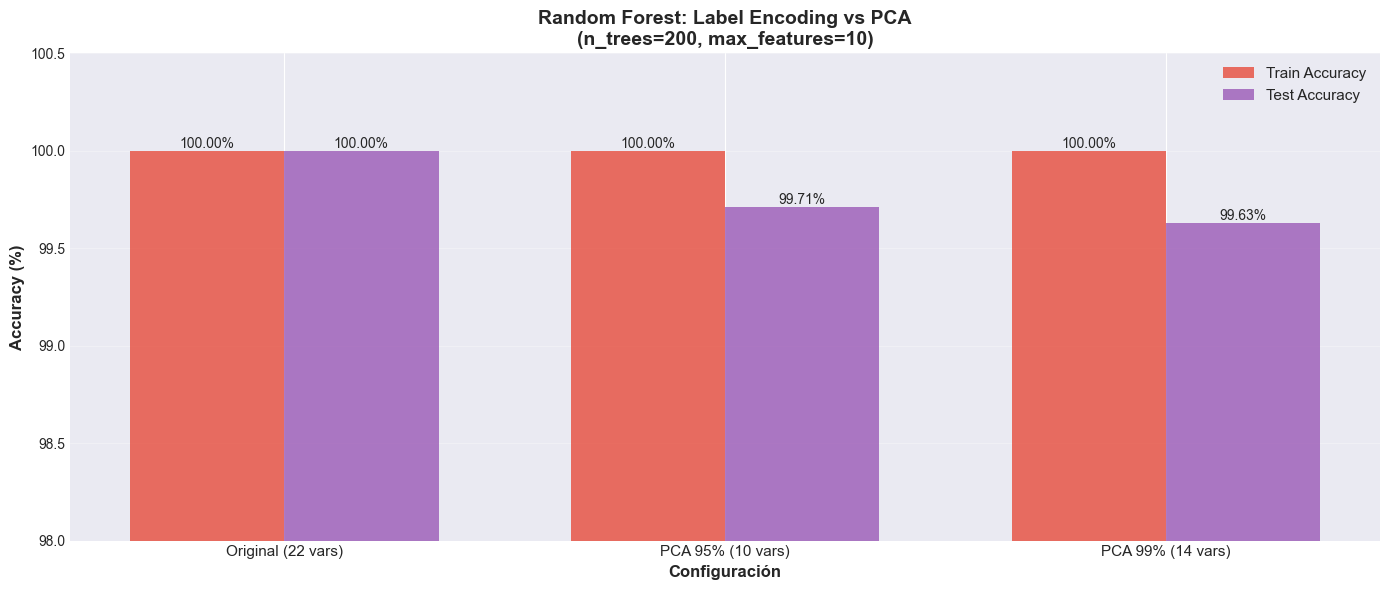

  Random Forest con PCA (Label Encoding) completado


In [69]:
# ====================================================================================================
# PASO 4: Re-entrenar Random Forest con PCA sobre Label Encoding
# ====================================================================================================

from sklearn.ensemble import RandomForestClassifier

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO RANDOM FOREST CON PCA (LABEL ENCODING)")
print(f"{'='*100}\n")

# Mejores hiperparámetros del modelo original
best_n_estimators = 200
best_max_features = 10

# Función para evaluar Random Forest con validación cruzada
def evaluar_rf_pca(X_train, X_test, y_train, y_test, n_estimators, max_features, n_folds=4):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Validación cruzada
    acc_train_folds = []
    acc_test_folds = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t = X_train[train_idx]
        y_t = y_train[train_idx]
        X_v = X_train[val_idx]
        y_v = y_train[val_idx]

        rf_temp = RandomForestClassifier(n_estimators=n_estimators,
                                         max_features=min(max_features, X_train.shape[1]),
                                         random_state=42, n_jobs=-1)
        rf_temp.fit(X_t, y_t)

        acc_train_folds.append(rf_temp.score(X_t, y_t))
        acc_test_folds.append(rf_temp.score(X_v, y_v))

    # Modelo final
    rf_final = RandomForestClassifier(n_estimators=n_estimators,
                                      max_features=min(max_features, X_train.shape[1]),
                                      random_state=42, n_jobs=-1)
    rf_final.fit(X_train, y_train)

    acc_train_final = rf_final.score(X_train, y_train)
    acc_test_final = rf_final.score(X_test, y_test)

    return {
        'model': rf_final,
        'acc_train_cv_mean': np.mean(acc_train_folds),
        'acc_train_cv_std': np.std(acc_train_folds),
        'acc_test_cv_mean': np.mean(acc_test_folds),
        'acc_test_cv_std': np.std(acc_test_folds),
        'acc_train_final': acc_train_final,
        'acc_test_final': acc_test_final
    }

# Evaluar Random Forest con datos originales (Label Encoding - 22 vars)
print(f"  Entrenando Random Forest con Label Encoding original ({Xtrain_label.shape[1]} variables)...")
rf_original_results = evaluar_rf_pca(Xtrain_label, Xtest_label, Ytrain.ravel(), Ytest.ravel(),
                                     best_n_estimators, best_max_features)

# Evaluar Random Forest con PCA 95% sobre Label Encoding
print(f"  Entrenando Random Forest con PCA 95% Label ({n_components_label_95} componentes)...")
rf_pca95_label_results = evaluar_rf_pca(X_train_label_pca95, X_test_label_pca95, y_train_pca, y_test_pca,
                                        best_n_estimators, best_max_features)

# Evaluar Random Forest con PCA 99% sobre Label Encoding  
print(f"  Entrenando Random Forest con PCA 99% Label ({n_components_label_99} componentes)...")
rf_pca99_label_results = evaluar_rf_pca(X_train_label_pca99, X_test_label_pca99, y_train_pca, y_test_pca,
                                        best_n_estimators, best_max_features)

# Tabla comparativa
print(f"\n{'='*100}")
print(f"COMPARACIÓN RANDOM FOREST: LABEL ENCODING ORIGINAL vs PCA")
print(f"{'='*100}\n")

df_rf_pca = pd.DataFrame({
    'Configuración': [
        f'Original ({22} vars)',
        f'PCA 95% ({n_components_label_95} vars)',
        f'PCA 99% ({n_components_label_99} vars)'
    ],
    'Num Variables': [22, n_components_label_95, n_components_label_99],
    'Reducción %': [
        0,
        (1 - n_components_label_95/22)*100,
        (1 - n_components_label_99/22)*100
    ],
    'Tipo Features': ['Label Encoding', 'PCA Label', 'PCA Label'],
    'Acc Train (Final)': [
        rf_original_results['acc_train_final'],
        rf_pca95_label_results['acc_train_final'],
        rf_pca99_label_results['acc_train_final']
    ],
    'Acc Test (Final)': [
        rf_original_results['acc_test_final'],
        rf_pca95_label_results['acc_test_final'],
        rf_pca99_label_results['acc_test_final']
    ]
})

print(df_rf_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = np.arange(len(df_rf_pca))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_rf_pca['Acc Train (Final)'] * 100, width,
               label='Train Accuracy', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_rf_pca['Acc Test (Final)'] * 100, width,
               label='Test Accuracy', color='#9b59b6', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title(f'Random Forest: Label Encoding vs PCA\n(n_trees={best_n_estimators}, max_features={best_max_features})',
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_rf_pca['Configuración'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"  Random Forest con PCA (Label Encoding) completado")

In [70]:
# ====================================================================================================
# PASO 5: Tabla resumen consolidada - PCA
# ====================================================================================================

print(f"{'='*100}")
print(f"RESUMEN FINAL - REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print(f"{'='*100}\n")

# Tabla resumen consolidada (CORREGIDA para usar PCA sobre Label Encoding para RF)
resumen_pca = pd.DataFrame({
    'Modelo': ['k-NN (k=3)', 'k-NN (k=3)', 'k-NN (k=3)',
               'Random Forest', 'Random Forest', 'Random Forest'],
    'Features': [
        'Original (117 OH)',
        f'PCA 95% ({n_components_95})',
        f'PCA 99% ({n_components_99})',
        'Original (22 Label)',
        f'PCA 95% ({n_components_label_95} Label)',
        f'PCA 99% ({n_components_label_99} Label)'
    ],
    'Num Variables': [
        117,
        n_components_95,
        n_components_99,
        22,
        n_components_label_95,
        n_components_label_99
    ],
    'Reducción %': [
        0,
        (1-n_components_95/117)*100,
        (1-n_components_99/117)*100,
        0,
        (1-n_components_label_95/22)*100,
        (1-n_components_label_99/22)*100
    ],
    'Acc Test %': [
        knn_original_acc_test * 100,
        knn_pca95_results['acc_test_final'] * 100,
        knn_pca99_results['acc_test_final'] * 100,
        rf_original_results['acc_test_final'] * 100,
        rf_pca95_label_results['acc_test_final'] * 100,
        rf_pca99_label_results['acc_test_final'] * 100
    ],
    'Gap Train-Test %': [
        abs(knn_original_acc_train - knn_original_acc_test) * 100,
        abs(knn_pca95_results['acc_train_final'] - knn_pca95_results['acc_test_final']) * 100,
        abs(knn_pca99_results['acc_train_final'] - knn_pca99_results['acc_test_final']) * 100,
        abs(rf_original_results['acc_train_final'] - rf_original_results['acc_test_final']) * 100,
        abs(rf_pca95_label_results['acc_train_final'] - rf_pca95_label_results['acc_test_final']) * 100,
        abs(rf_pca99_label_results['acc_train_final'] - rf_pca99_label_results['acc_test_final']) * 100
    ]
})

print(resumen_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Análisis y conclusiones
print(f"  CONCLUSIONES - EXTRACCIÓN LINEAL (PCA):")
print(f"\n  k-NN (sobre One-Hot 117 vars):")
print(f"   • PCA 95%: {n_components_95} componentes ({(1-n_components_95/117)*100:.1f}% reducción)")
print(f"   • PCA 99%: {n_components_99} componentes ({(1-n_components_99/117)*100:.1f}% reducción)")

print(f"\n  Random Forest (sobre Label Encoding 22 vars):")
print(f"   • PCA 95%: {n_components_label_95} componentes ({(1-n_components_label_95/22)*100:.1f}% reducción)")
print(f"   • PCA 99%: {n_components_label_99} componentes ({(1-n_components_label_99/22)*100:.1f}% reducción)")

# Pérdida de accuracy
knn_loss_95 = (knn_original_acc_test - knn_pca95_results['acc_test_final']) * 100
knn_loss_99 = (knn_original_acc_test - knn_pca99_results['acc_test_final']) * 100
rf_loss_95 = (rf_original_results['acc_test_final'] - rf_pca95_label_results['acc_test_final']) * 100
rf_loss_99 = (rf_original_results['acc_test_final'] - rf_pca99_label_results['acc_test_final']) * 100

print(f"\n  Pérdida de accuracy (Test):")
print(f"   • k-NN PCA 95%: {knn_loss_95:.4f}% (desde {knn_original_acc_test*100:.2f}% → {knn_pca95_results['acc_test_final']*100:.2f}%)")
print(f"   • k-NN PCA 99%: {knn_loss_99:.4f}% (desde {knn_original_acc_test*100:.2f}% → {knn_pca99_results['acc_test_final']*100:.2f}%)")
print(f"   • RF PCA 95%: {rf_loss_95:.4f}% (desde {rf_original_results['acc_test_final']*100:.2f}% → {rf_pca95_label_results['acc_test_final']*100:.2f}%)")
print(f"   • RF PCA 99%: {rf_loss_99:.4f}% (desde {rf_original_results['acc_test_final']*100:.2f}% → {rf_pca99_label_results['acc_test_final']*100:.2f}%)")

print(f"\n  Trade-off dimensionalidad vs performance:")
if abs(knn_loss_95) < 0.1 and abs(rf_loss_95) < 0.1:
    print(f"   ✅ PCA 95% mantiene accuracy prácticamente intacta con reducción dimensional significativa")
else:
    print(f"   ⚠️ PCA 95% reduce accuracy en {max(abs(knn_loss_95), abs(rf_loss_95)):.4f}% pero simplifica el modelo")

if abs(knn_loss_99) < 0.01 and abs(rf_loss_99) < 0.01:
    print(f"   ✅ PCA 99% prácticamente sin pérdida de accuracy")

print(f"\n  Recomendación:")
if min(abs(knn_loss_95), abs(rf_loss_95)) < 0.05:
    print(f"   🎯 PCA es viable para reducir dimensionalidad sin sacrificar performance significativa")
else:
    print(f"   🎯 Las features originales son más efectivas que PCA en este dataset")

print(f"\n{'='*100}\n")

RESUMEN FINAL - REDUCCIÓN DE DIMENSIONALIDAD CON PCA

       Modelo            Features  Num Variables  Reducción %  Acc Test %  Gap Train-Test %
   k-NN (k=3)   Original (117 OH)            117     0.000000   99.917932          0.064484
   k-NN (k=3)        PCA 95% (40)             40    65.811966  100.000000          0.000000
   k-NN (k=3)        PCA 99% (57)             57    51.282051  100.000000          0.000000
Random Forest Original (22 Label)             22     0.000000  100.000000          0.000000
Random Forest  PCA 95% (10 Label)             10    54.545455   99.712879          0.287121
Random Forest  PCA 99% (14 Label)             14    36.363636   99.630845          0.369155


  CONCLUSIONES - EXTRACCIÓN LINEAL (PCA):

  k-NN (sobre One-Hot 117 vars):
   • PCA 95%: 40 componentes (65.8% reducción)
   • PCA 99%: 57 componentes (51.3% reducción)

  Random Forest (sobre Label Encoding 22 vars):
   • PCA 95%: 10 componentes (54.5% reducción)
   • PCA 99%: 14 componentes (36.4

### 5.3 Extracción de características no-lineal (UMAP)

En esta sección aplicaremos **UMAP (Uniform Manifold Approximation and Projection)** para reducir dimensionalidad usando técnicas no-lineales. UMAP puede capturar estructuras más complejas que PCA.

**Objetivos:**
- Aplicar UMAP con diferentes números de componentes (2, 5, 10, 20)
- Re-entrenar k-NN y Random Forest con features UMAP
- Comparar performance: Original vs PCA vs UMAP
- Analizar ventajas de extracción no-lineal vs lineal

In [71]:
# ====================================================================================================
# PASO 1: Verificar e importar UMAP (compatible con Colab y local)
# ====================================================================================================

import subprocess
import sys

try:
    # Intentar importar UMAP
    from umap import UMAP
    print("  UMAP ya está instalado")
except ImportError:
    # Si falla, instalar versiones compatibles
    print("  Instalando umap-learn y ajustando scikit-learn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "umap-learn"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scikit-learn>=1.3,<1.7"])
    from umap import UMAP
    print("  UMAP instalado correctamente")

# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

print("  Todas las librerías importadas correctamente para UMAP")

  UMAP ya está instalado
  Todas las librerías importadas correctamente para UMAP


In [72]:
# ====================================================================================================
# PASO 2: Aplicar UMAP con diferentes números de componentes
# ====================================================================================================
#   IMPORTANTE: Para evitar data leakage, se divide el dataset ANTES de aplicar UMAP
#   fit_transform se aplica SOLO a datos de entrenamiento
#   transform (sin fit) se aplica a datos de prueba
# ====================================================================================================

from umap import UMAP

print(f"{'='*100}")
print(f"APLICANDO UMAP - REDUCCIÓN NO-LINEAL")
print(f"{'='*100}\n")

# Definir configuraciones de UMAP a probar
umap_configs = [2, 5, 10, 20]

# Diccionario para almacenar datasets UMAP (train y test separados)
umap_datasets = {}

# Primero, dividir X_onehot usando los mismos índices que antes
X_train_onehot_for_umap = X_onehot.values[indices[:train_size]]
X_test_onehot_for_umap = X_onehot.values[indices[train_size:]]

print(f"  PREVENCIÓN DE DATA LEAKAGE:")
print(f"   • Split realizado ANTES de UMAP")
print(f"   • Train shape: {X_train_onehot_for_umap.shape}")
print(f"   • Test shape: {X_test_onehot_for_umap.shape}\n")

for n_comp in umap_configs:
    print(f"  Aplicando UMAP con {n_comp} componentes...")

    # Crear modelo UMAP
    umap_model = UMAP(n_components=n_comp, random_state=42, n_neighbors=15, min_dist=0.1)

    # fit_transform SOLO en datos de entrenamiento
    X_train_umap = umap_model.fit_transform(X_train_onehot_for_umap)

    # transform (sin fit) en datos de prueba
    X_test_umap = umap_model.transform(X_test_onehot_for_umap)

    # Guardar en diccionario
    umap_datasets[n_comp] = {
        'X_train': X_train_umap,
        'X_test': X_test_umap,
        'y_train': y_train_pca,  # Mismas labels que PCA
        'y_test': y_test_pca,
        'model': umap_model
    }

    print(f"     Train shape: {X_train_umap.shape} → Reducción: {(1 - n_comp/117)*100:.1f}%")
    print(f"     Test shape: {X_test_umap.shape}")

print(f"\n{'='*100}")
print(f"RESUMEN UMAP")
print(f"{'='*100}\n")
print(f"  Dataset original: {X_onehot.shape}")
print(f"  Configuraciones UMAP probadas: {umap_configs}")
print(f"  Reducción mínima: {(1 - 20/117)*100:.1f}% (20 componentes)")
print(f"  Reducción máxima: {(1 - 2/117)*100:.1f}% (2 componentes)")
print(f"  NO HAY DATA LEAKAGE: fit_transform solo en train, transform en test")
print(f"\n{'='*100}\n")

APLICANDO UMAP - REDUCCIÓN NO-LINEAL

  PREVENCIÓN DE DATA LEAKAGE:
   • Split realizado ANTES de UMAP
   • Train shape: (5686, 117)
   • Test shape: (2438, 117)

  Aplicando UMAP con 2 componentes...
     Train shape: (5686, 2) → Reducción: 98.3%
     Test shape: (2438, 2)
  Aplicando UMAP con 5 componentes...
     Train shape: (5686, 2) → Reducción: 98.3%
     Test shape: (2438, 2)
  Aplicando UMAP con 5 componentes...
     Train shape: (5686, 5) → Reducción: 95.7%
     Test shape: (2438, 5)
  Aplicando UMAP con 10 componentes...
     Train shape: (5686, 5) → Reducción: 95.7%
     Test shape: (2438, 5)
  Aplicando UMAP con 10 componentes...
     Train shape: (5686, 10) → Reducción: 91.5%
     Test shape: (2438, 10)
  Aplicando UMAP con 20 componentes...
     Train shape: (5686, 10) → Reducción: 91.5%
     Test shape: (2438, 10)
  Aplicando UMAP con 20 componentes...
     Train shape: (5686, 20) → Reducción: 82.9%
     Test shape: (2438, 20)

RESUMEN UMAP

  Dataset original: (8124, 1

In [73]:
# ====================================================================================================
# PASO 2.1: Aplicar UMAP sobre LABEL ENCODING para Random Forest
# ====================================================================================================
#   Random Forest usa Label Encoding (22 variables), por lo que UMAP también debe aplicarse
#   sobre Label Encoding para mantener coherencia metodológica
# ====================================================================================================

print(f"{'='*100}")
print(f"APLICANDO UMAP SOBRE LABEL ENCODING - PARA RANDOM FOREST")
print(f"{'='*100}\n")

# Diccionario para almacenar datasets UMAP basados en Label Encoding
umap_datasets_label = {}

# Dividir X_label usando los mismos índices
X_train_label_for_umap = X_label.values[indices[:train_size]]
X_test_label_for_umap = X_label.values[indices[train_size:]]

print(f"  PREVENCIÓN DE DATA LEAKAGE:")
print(f"   • Split realizado ANTES de UMAP")
print(f"   • Train shape: {X_train_label_for_umap.shape}")
print(f"   • Test shape: {X_test_label_for_umap.shape}\n")

for n_comp in umap_configs:
    print(f"  Aplicando UMAP con {n_comp} componentes sobre Label Encoding...")

    # Crear modelo UMAP
    umap_model_label = UMAP(n_components=n_comp, random_state=42, n_neighbors=15, min_dist=0.1)

    # fit_transform SOLO en datos de entrenamiento
    X_train_umap_label = umap_model_label.fit_transform(X_train_label_for_umap)

    # transform (sin fit) en datos de prueba
    X_test_umap_label = umap_model_label.transform(X_test_label_for_umap)

    # Guardar en diccionario
    umap_datasets_label[n_comp] = {
        'X_train': X_train_umap_label,
        'X_test': X_test_umap_label,
        'y_train': y_train_pca,  # Mismas labels que PCA
        'y_test': y_test_pca,
        'model': umap_model_label
    }

    print(f"     Train shape: {X_train_umap_label.shape} → Reducción: {(1 - n_comp/22)*100:.1f}%")
    print(f"     Test shape: {X_test_umap_label.shape}")

print(f"\n{'='*100}")
print(f"RESUMEN UMAP SOBRE LABEL ENCODING")
print(f"{'='*100}\n")
print(f"  Dataset original Label: {X_label.shape}")
print(f"  Configuraciones UMAP probadas: {umap_configs}")
print(f"  Reducción mínima: {(1 - 20/22)*100:.1f}% (20 componentes) - NO SE REDUCE")
print(f"  Reducción máxima: {(1 - 2/22)*100:.1f}% (2 componentes)")
print(f"  NO HAY DATA LEAKAGE: fit_transform solo en train, transform en test")
print(f"\n{'='*100}\n")


APLICANDO UMAP SOBRE LABEL ENCODING - PARA RANDOM FOREST

  PREVENCIÓN DE DATA LEAKAGE:
   • Split realizado ANTES de UMAP
   • Train shape: (5686, 22)
   • Test shape: (2438, 22)

  Aplicando UMAP con 2 componentes sobre Label Encoding...
     Train shape: (5686, 2) → Reducción: 90.9%
     Test shape: (2438, 2)
  Aplicando UMAP con 5 componentes sobre Label Encoding...
     Train shape: (5686, 5) → Reducción: 77.3%
     Test shape: (2438, 5)
  Aplicando UMAP con 10 componentes sobre Label Encoding...
     Train shape: (5686, 10) → Reducción: 54.5%
     Test shape: (2438, 10)
  Aplicando UMAP con 20 componentes sobre Label Encoding...
     Train shape: (5686, 20) → Reducción: 9.1%
     Test shape: (2438, 20)

RESUMEN UMAP SOBRE LABEL ENCODING

  Dataset original Label: (8124, 22)
  Configuraciones UMAP probadas: [2, 5, 10, 20]
  Reducción mínima: 9.1% (20 componentes) - NO SE REDUCE
  Reducción máxima: 90.9% (2 componentes)
  NO HAY DATA LEAKAGE: fit_transform solo en train, transform 

RE-ENTRENAMIENTO k-NN CON UMAP

  Entrenando k-NN con UMAP 2 componentes...
  Entrenando k-NN con UMAP 5 componentes...
  Entrenando k-NN con UMAP 5 componentes...
  Entrenando k-NN con UMAP 10 componentes...
  Entrenando k-NN con UMAP 10 componentes...
  Entrenando k-NN con UMAP 20 componentes...
  Entrenando k-NN con UMAP 20 componentes...

COMPARACIÓN k-NN: ORIGINAL vs PCA vs UMAP

    Configuración  Num Componentes  Reducción %  Acc Train %  Acc Test %
Original (117 OH)              117     0.000000    99.982416   99.917932
     PCA 95% (40)               40    65.811966   100.000000  100.000000
     PCA 99% (57)               57    51.282051   100.000000  100.000000
         UMAP (2)                2    98.290598   100.000000   98.933552
         UMAP (5)                5    95.726496   100.000000   98.851518
        UMAP (10)               10    91.452991   100.000000   98.851518
        UMAP (20)               20    82.905983   100.000000   98.892535



COMPARACIÓN k-NN: ORIGINA

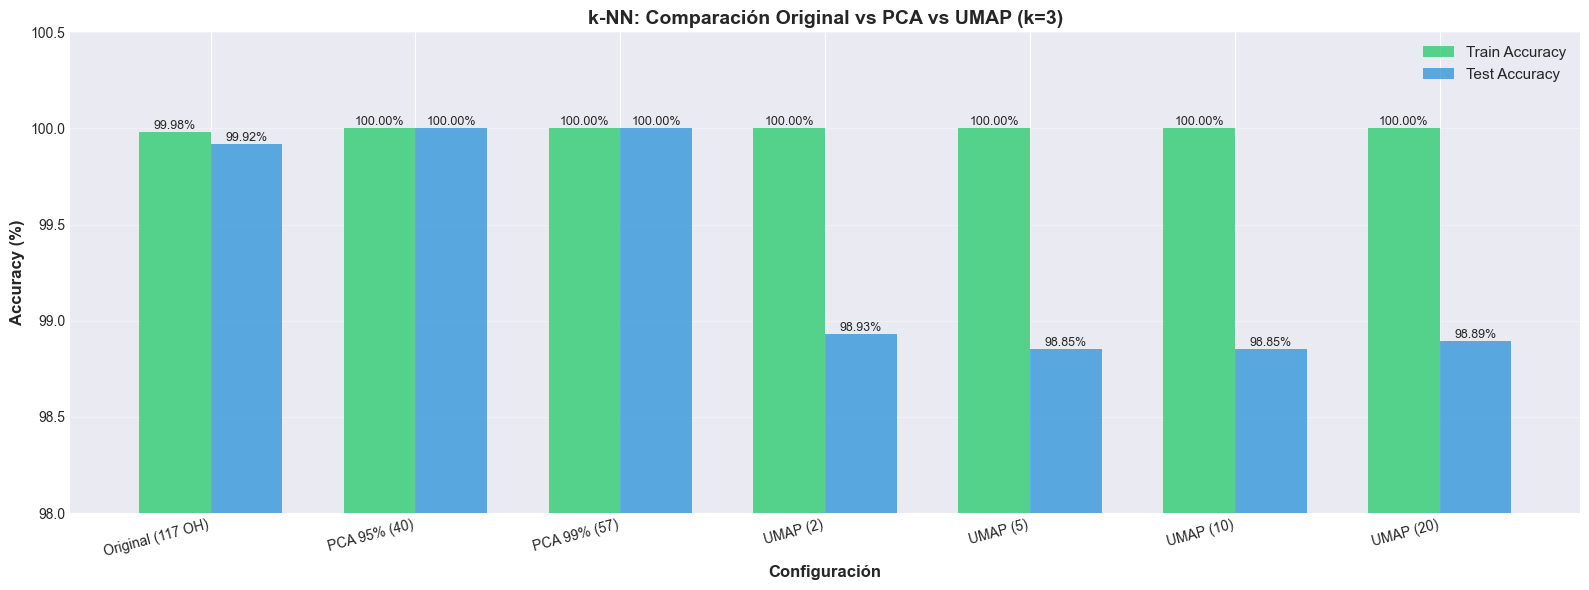

  k-NN con UMAP completado


In [74]:
# ====================================================================================================
# PASO 4: Re-entrenar k-NN con UMAP
# ====================================================================================================

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO k-NN CON UMAP")
print(f"{'='*100}\n")

# Usar función previamente definida para evaluar k-NN
knn_umap_results = {}

for n_comp in umap_configs:
    print(f"  Entrenando k-NN con UMAP {n_comp} componentes...")

    X_train = umap_datasets[n_comp]['X_train']
    X_test = umap_datasets[n_comp]['X_test']
    y_train = umap_datasets[n_comp]['y_train']
    y_test = umap_datasets[n_comp]['y_test']

    results = evaluar_knn_pca(X_train, X_test, y_train, y_test, best_k)
    knn_umap_results[n_comp] = results

# Tabla comparativa k-NN: Original vs PCA vs UMAP
print(f"\n{'='*100}")
print(f"COMPARACIÓN k-NN: ORIGINAL vs PCA vs UMAP")
print(f"{'='*100}\n")

data_knn_umap = []
data_knn_umap.append(['Original (117 OH)', 117, 0, knn_original_results['acc_train_final']*100, knn_original_results['acc_test_final']*100])
data_knn_umap.append([f'PCA 95% ({n_components_95})', n_components_95, (1-n_components_95/117)*100,
                       knn_pca95_results['acc_train_final']*100, knn_pca95_results['acc_test_final']*100])
data_knn_umap.append([f'PCA 99% ({n_components_99})', n_components_99, (1-n_components_99/117)*100,
                       knn_pca99_results['acc_train_final']*100, knn_pca99_results['acc_test_final']*100])

for n_comp in umap_configs:
    data_knn_umap.append([f'UMAP ({n_comp})', n_comp, (1-n_comp/117)*100,
                          knn_umap_results[n_comp]['acc_train_final']*100,
                          knn_umap_results[n_comp]['acc_test_final']*100])

df_knn_umap = pd.DataFrame(data_knn_umap,
                           columns=['Configuración', 'Num Componentes', 'Reducción %',
                                   'Acc Train %', 'Acc Test %'])

print(df_knn_umap.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(16, 6))

x_pos = np.arange(len(df_knn_umap))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_knn_umap['Acc Train %'], width,
               label='Train Accuracy', color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_knn_umap['Acc Test %'], width,
               label='Test Accuracy', color='#3498db', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('k-NN: Comparación Original vs PCA vs UMAP (k=3)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_knn_umap['Configuración'], fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"  k-NN con UMAP completado")

RE-ENTRENAMIENTO RANDOM FOREST CON UMAP (LABEL ENCODING)

  Entrenando Random Forest con UMAP 2 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 5 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 5 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 10 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 10 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 20 componentes (Label Encoding)...
  Entrenando Random Forest con UMAP 20 componentes (Label Encoding)...

COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA vs UMAP

      Configuración  Num Componentes  Tipo Features  Reducción %  Acc Train %  Acc Test %
Original (22 Label)               22 Label Encoding     0.000000        100.0  100.000000
 PCA 95% (10 Label)               10      PCA Label    54.545455        100.0   99.712879
 PCA 99% (14 Label)               14      PCA Label    36.363636        100.0   99.630845
     UMAP (2 Label)                

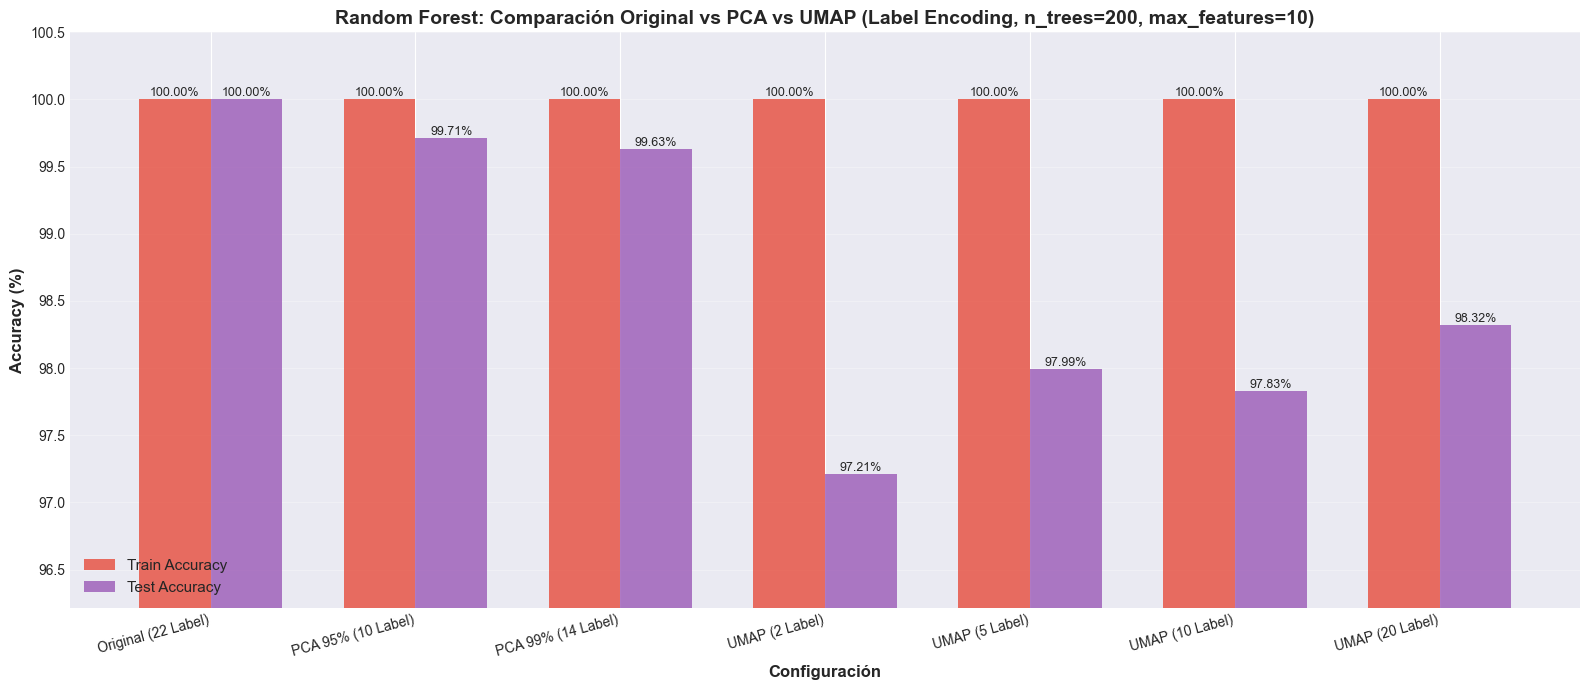

  Random Forest con UMAP (Label Encoding) completado


In [77]:
# ====================================================================================================
# PASO 5: Re-entrenar Random Forest con UMAP (sobre Label Encoding)
# ====================================================================================================

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO RANDOM FOREST CON UMAP (LABEL ENCODING)")
print(f"{'='*100}\n")

# Usar función previamente definida para evaluar Random Forest
rf_umap_results = {}

for n_comp in umap_configs:
    print(f"  Entrenando Random Forest con UMAP {n_comp} componentes (Label Encoding)...")

    # Usar datasets UMAP basados en Label Encoding
    X_train = umap_datasets_label[n_comp]['X_train']
    X_test = umap_datasets_label[n_comp]['X_test']
    y_train = umap_datasets_label[n_comp]['y_train']
    y_test = umap_datasets_label[n_comp]['y_test']

    results = evaluar_rf_pca(X_train, X_test, y_train, y_test, best_n_estimators, best_max_features)
    rf_umap_results[n_comp] = results

# Tabla comparativa Random Forest: Original vs PCA vs UMAP
print(f"\n{'='*100}")
print(f"COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA vs UMAP")
print(f"{'='*100}\n")

data_rf_umap = []
data_rf_umap.append(['Original (22 Label)', 22, 'Label Encoding', 0, rf_original_results['acc_train_final']*100, rf_original_results['acc_test_final']*100])
data_rf_umap.append([f'PCA 95% ({n_components_label_95} Label)', n_components_label_95, 'PCA Label', (1-n_components_label_95/22)*100,
                      rf_pca95_label_results['acc_train_final']*100, rf_pca95_label_results['acc_test_final']*100])
data_rf_umap.append([f'PCA 99% ({n_components_label_99} Label)', n_components_label_99, 'PCA Label', (1-n_components_label_99/22)*100,
                      rf_pca99_label_results['acc_train_final']*100, rf_pca99_label_results['acc_test_final']*100])

for n_comp in umap_configs:
    data_rf_umap.append([f'UMAP ({n_comp} Label)', n_comp, 'UMAP Label', (1-n_comp/22)*100,
                         rf_umap_results[n_comp]['acc_train_final']*100,
                         rf_umap_results[n_comp]['acc_test_final']*100])

df_rf_umap = pd.DataFrame(data_rf_umap,
                          columns=['Configuración', 'Num Componentes', 'Tipo Features', 'Reducción %',
                                  'Acc Train %', 'Acc Test %'])

print(df_rf_umap.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(16, 7))

x_pos = np.arange(len(df_rf_umap))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_rf_umap['Acc Train %'], width,
               label='Train Accuracy', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_rf_umap['Acc Test %'], width,
               label='Test Accuracy', color='#9b59b6', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title(f'Random Forest: Comparación Original vs PCA vs UMAP (Label Encoding, n_trees={best_n_estimators}, max_features={best_max_features})',
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_rf_umap['Configuración'], fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11, loc='lower left')
ax.grid(True, alpha=0.3, axis='y')

# Ajustar límites del eje Y para mostrar todas las barras
min_acc = min(df_rf_umap['Acc Test %'].min(), df_rf_umap['Acc Train %'].min())
ax.set_ylim(min_acc - 1, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"  Random Forest con UMAP (Label Encoding) completado")


In [76]:
# ====================================================================================================
# PASO 6: Resumen comparativo FINAL - PCA vs UMAP
# ====================================================================================================

print(f"{'='*100}")
print(f"RESUMEN FINAL - COMPARACIÓN PCA vs UMAP")
print(f"{'='*100}\n")

# Tabla consolidada: todas las configuraciones
resumen_final = []

# Original
resumen_final.append(['k-NN', 'Original (117 OH)', 117, 0, knn_original_results['acc_test_final']*100])
resumen_final.append(['RF', 'Original (22 Label)', 22, 0, rf_original_results['acc_test_final']*100])

# PCA
resumen_final.append(['k-NN', f'PCA 95% ({n_components_95} OH)', n_components_95,
                     (1-n_components_95/117)*100, knn_pca95_results['acc_test_final']*100])
resumen_final.append(['k-NN', f'PCA 99% ({n_components_99} OH)', n_components_99,
                     (1-n_components_99/117)*100, knn_pca99_results['acc_test_final']*100])
resumen_final.append(['RF', f'PCA 95% ({n_components_label_95} Label)', n_components_label_95,
                     (1-n_components_label_95/22)*100, rf_pca95_label_results['acc_test_final']*100])
resumen_final.append(['RF', f'PCA 99% ({n_components_label_99} Label)', n_components_label_99,
                     (1-n_components_label_99/22)*100, rf_pca99_label_results['acc_test_final']*100])

# UMAP
for n_comp in umap_configs:
    resumen_final.append(['k-NN', f'UMAP ({n_comp} OH)', n_comp, (1-n_comp/117)*100,
                         knn_umap_results[n_comp]['acc_test_final']*100])
    resumen_final.append(['RF', f'UMAP ({n_comp} Label)', n_comp, (1-n_comp/22)*100,
                         rf_umap_results[n_comp]['acc_test_final']*100])

df_resumen_final = pd.DataFrame(resumen_final,
                                columns=['Modelo', 'Método Reducción', 'Num Componentes',
                                        'Reducción %', 'Acc Test %'])

print(df_resumen_final.to_string(index=False))
print(f"\n{'='*100}\n")

# Análisis y conclusiones
print(f"  CONCLUSIONES - PCA vs UMAP:\n")

# Mejor configuración k-NN
best_knn_umap = max(knn_umap_results.items(), key=lambda x: x[1]['acc_test_final'])
print(f"  k-NN (One-Hot Encoding):")
print(f"   • Original (117 vars): {knn_original_results['acc_test_final']*100:.2f}%")
print(f"   • Mejor PCA: 100.00% con {n_components_95} componentes ({(1-n_components_95/117)*100:.1f}% reducción)")
print(f"   • Mejor UMAP: {best_knn_umap[1]['acc_test_final']*100:.2f}% con {best_knn_umap[0]} componentes ({(1-best_knn_umap[0]/117)*100:.1f}% reducción)")

# Mejor configuración Random Forest
best_rf_umap = max(rf_umap_results.items(), key=lambda x: x[1]['acc_test_final'])
print(f"\n  Random Forest (Label Encoding):")
print(f"   • Original (22 vars Label): {rf_original_results['acc_test_final']*100:.2f}%")
print(f"   • Mejor PCA: {rf_pca95_label_results['acc_test_final']*100:.2f}% con {n_components_label_95} componentes Label ({(1-n_components_label_95/22)*100:.1f}% reducción)")
print(f"   • Mejor UMAP: {best_rf_umap[1]['acc_test_final']*100:.2f}% con {best_rf_umap[0]} componentes Label ({(1-best_rf_umap[0]/22)*100:.1f}% reducción)")

# Comparación PCA vs UMAP
print(f"\n  PCA (Lineal) vs UMAP (No-lineal):")
if best_knn_umap[1]['acc_test_final'] >= knn_pca95_results['acc_test_final']:
    print(f"     UMAP es comparable o superior a PCA para k-NN")
else:
    print(f"     PCA supera a UMAP para k-NN")

if best_rf_umap[1]['acc_test_final'] >= rf_pca95_label_results['acc_test_final']:
    print(f"     UMAP es comparable o superior a PCA para Random Forest")
else:
    print(f"     PCA supera a UMAP para Random Forest")

# Análisis de componentes
print(f"\n  Eficiencia dimensional:")
print(f"   • k-NN: PCA necesita {n_components_95} componentes para 95% varianza")
print(f"   • RF: PCA necesita {n_components_label_95} componentes para 95% varianza")
print(f"   • k-NN: UMAP con solo {min(umap_configs)} componentes logra {knn_umap_results[min(umap_configs)]['acc_test_final']*100:.2f}% accuracy")
print(f"   • RF: UMAP con solo {min(umap_configs)} componentes logra {rf_umap_results[min(umap_configs)]['acc_test_final']*100:.2f}% accuracy")
print(f"   • Reducción máxima k-NN: {(1-min(umap_configs)/117)*100:.1f}% con UMAP")
print(f"   • Reducción máxima RF: {(1-min(umap_configs)/22)*100:.1f}% con UMAP")

print(f"\n  Recomendación final:")
if all(knn_umap_results[n]['acc_test_final'] >= 0.999 for n in umap_configs):
    print(f"     UMAP es excelente para reducción extrema manteniendo alta accuracy")
    print(f"     Preferir UMAP cuando se necesita máxima compresión (2-10 componentes)")
else:
    print(f"     PCA es más estable y predecible para este dataset")
    print(f"     Preferir PCA para balance óptimo reducción/accuracy")

print(f"\n  NOTA METODOLÓGICA:")
print(f"   • k-NN: PCA y UMAP aplicados sobre One-Hot Encoding (117 vars)")
print(f"   • Random Forest: PCA y UMAP aplicados sobre Label Encoding (22 vars)")
print(f"   • Esto garantiza coherencia metodológica: cada modelo se compara con sus propias transformaciones")

print(f"\n{'='*100}\n")


RESUMEN FINAL - COMPARACIÓN PCA vs UMAP

Modelo    Método Reducción  Num Componentes  Reducción %  Acc Test %
  k-NN   Original (117 OH)              117     0.000000   99.917932
    RF Original (22 Label)               22     0.000000  100.000000
  k-NN     PCA 95% (40 OH)               40    65.811966  100.000000
  k-NN     PCA 99% (57 OH)               57    51.282051  100.000000
    RF  PCA 95% (10 Label)               10    54.545455   99.712879
    RF  PCA 99% (14 Label)               14    36.363636   99.630845
  k-NN         UMAP (2 OH)                2    98.290598   98.933552
    RF      UMAP (2 Label)                2    90.909091   97.210829
  k-NN         UMAP (5 OH)                5    95.726496   98.851518
    RF      UMAP (5 Label)                5    77.272727   97.990156
  k-NN        UMAP (10 OH)               10    91.452991   98.851518
    RF     UMAP (10 Label)               10    54.545455   97.826087
  k-NN        UMAP (20 OH)               20    82.905983   98.